# **Employee Attrition Problem**

## `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd       # dataframe manipulation
import matplotlib.pyplot as plt       # Visualization
import seaborn as sns

from scipy.stats import norm      # mathematical calculation
from sklearn.preprocessing import StandardScaler      # scaling our data
from scipy import stats       # mathematical calculation

import warnings
warnings.filterwarnings('ignore')

# magicline comment to let our matplot functions run
%matplotlib inline

from tqdm import tqdm       # makes our looping (through rows) fast

In [2]:
# Importing dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the train dataset, train salaries dataset & test dataset

train_data = pd.read_csv('/content/drive/MyDrive/Employee_Attrition_Salary_data/train_dataset.csv')
train_data_salaries = pd.read_csv('/content/drive/MyDrive/Employee_Attrition_Salary_data/train_salaries.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Employee_Attrition_Salary_data/test_dataset.csv')

In [4]:
# Checking the train dataset

train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
# Checking the train salaries dataset

train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
# Checking the test dataset

test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
# Merging the train dataset & train salaries dataset for our training dataset

train_data = pd.merge(train_data,train_data_salaries,on='jobId')
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
'''
Removing Salaries less than 30 becoz of degree and major (employees are not expected to have salary less than 30).
It is something imbalance in dataset.
'''
# Salaries less tha 30(30k usd) can be removed as such salary(or year) per month is not expected.
train_data = train_data[train_data['salary'] > 30]

## `Exploratory Data Analysis (EDA)`

### `Basic EDA`

Identifying the no. of features/columns

In [9]:
# Column names

train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [10]:
# Check which column are having categorical, numerical or boolean values in train dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [11]:
# Check which column are having categorical, numerical or boolean values in test dataset

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
# Descriptive statistics for train dataset

train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [13]:
# Descriptive Statistics for test dataset

test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In above test & train descriptive statistic we can see min (years of experience) is 0, that is we also have freshers in our dataset.

In [14]:
# Total no. of samples in the dataset

print('Lenght of train_data : ',len(train_data))
print('Lenght of test_data : ',len(test_data))

Lenght of train_data :  997548
Lenght of test_data :  1000000


In [15]:
# Unique Values in train dataset

for x in train_data.columns:
  print(x,' : ',len(train_data[x].unique()))

jobId  :  997548
companyId  :  63
jobType  :  8
degree  :  5
major  :  9
industry  :  7
yearsExperience  :  25
milesFromMetropolis  :  100
salary  :  265


In [16]:
# Unique Values in test dataset

for x in test_data.columns:
  print(x,':',len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


In [17]:
# Checking the null values

train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [18]:
# Checking the null values

test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

We see that columns `jobId` & `companyId` have all unique values so these two columns will not help in predicting our final output (salary).
Hence, we will drop these two columns.

In [19]:
# Dropping jobId and companyId column from train dataset

train_data = train_data.drop(['jobId','companyId'], axis=1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [20]:
# Dropping jobId and companyId columns from test dataset

test_data = test_data.drop(['jobId','companyId'], axis=1)
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [21]:
# Checking for categorical columns in train dataset

categorical_list = []
var_list = []

for x in train_data.columns:
  if train_data[x].dtype == 'object':
    categorical_list.append(x)
  else:
    var_list.append(x)

In [22]:
print(categorical_list)
print(var_list)

['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


### `Correlation Matrix`

Correlation matrix shows the corrlation b/w numerical data types.

In [23]:
# Correlation Matrix using pandas

corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


From above Correlation Matrix :
1. yearsExperience and salary are positively correlated.
2. yearsExperince and milesFromMetropolis have no correlation.
3. milesFromMetropolis and salary are weakly negatively correlated.

[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

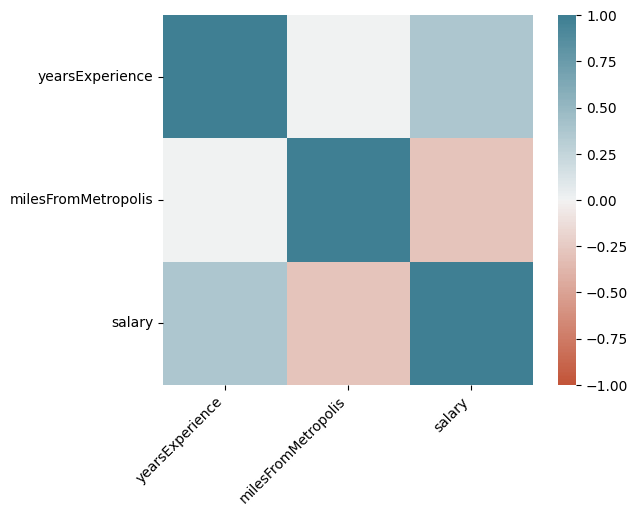

In [24]:
# Correlation Matrix using seaborn

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

### `Chi-Square Test`

1. Common test used to check relationship between categorical variables.
2. Null Hypothesis : There is no relationship between categorical variables, i.e, they are independent.
3. Alternate Hypothesis : There is relationship between categorical variables, i.e, they are not independent.
4. We have to calculate p-Value and if p-Value is less than level of significance(0.05), then we reject the null hypothesis, i.e, there is some relationship between catogorical variables.


In [25]:
# Importing libaries for chi-square test

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [26]:
# Defining a function to perform chi-square test for 2 categorical variables

def perform_chi_square_test(var_1, var_2):

  # Contingency Table : It is a crosstab b/w 2 variables. A matrix of uniques values of both variables(columns/features) as rows and columns.
  contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])

  # Observed Values : They are taking contingency table values which we got from our dataset.
  observed_values = contingency_table.values

  # Expected Values : The expected value of contingency table
  b = chi2_contingency(contingency_table)
  expected_values = b[3]

  # Degrees of freedom : (no. of rows - 1)*(no. of columns - 1)
  no_of_rows = len(contingency_table.iloc[0:,0])
  no_of_columns = len(contingency_table.iloc[0,0:])
  degree_f = (no_of_rows - 1)*(no_of_columns - 1)
  print('Degree of Freedom : ',degree_f)

  # Level of Significance :
  alpha = 0.05
  print('Significance Level : ',alpha)

  # chi-square statistic : sum of [(O-E)^2]/[E]
  chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
  chi_square_statistic = chi_square[0] + chi_square[1]
  print('chi-square statistic : ',chi_square_statistic)

  # Critical_Value : for testing the hypothesis (you can also do it by p_Value)
  critical_value = chi2.ppf(q = 1-alpha, df = degree_f)
  print('critical_value : ',critical_value)

  # p_Value :
  p_value = 1 - chi2.cdf(x = chi_square_statistic, df = degree_f)
  print('p_Value : ',p_value)

  if chi_square_statistic >= critical_value:
    print('Reject H0, There is a relationship b/w 2 categorical variables.')
  else:
    print('Do not Reject H0, There is no relationship b/w 2 categorical variables.')

  if p_value <= alpha:
    print('Reject H0, There is a relationship b/w 2 categorical variables.')
  else:
    print('Do not Reject H0, There is no relationship b/w 2 categorical variables.')

In [27]:
# Iterating through the categorical list and checking the relationship

for x in categorical_list:
  for i in categorical_list:
    if i != x:
      print('chi-square test on : ',x,' & ',i,'\n')
      perform_chi_square_test(x,i)
      print('-------------------------------------\n')

chi-square test on :  jobType  &  degree 

Degree of Freedom :  28
Significance Level :  0.05
chi-square statistic :  49153.86411257831
critical_value :  41.33713815142739
p_Value :  0.0
Reject H0, There is a relationship b/w 2 categorical variables.
Reject H0, There is a relationship b/w 2 categorical variables.
-------------------------------------

chi-square test on :  jobType  &  major 

Degree of Freedom :  56
Significance Level :  0.05
chi-square statistic :  16381.915810303108
critical_value :  74.46832415930936
p_Value :  0.0
Reject H0, There is a relationship b/w 2 categorical variables.
Reject H0, There is a relationship b/w 2 categorical variables.
-------------------------------------

chi-square test on :  jobType  &  industry 

Degree of Freedom :  42
Significance Level :  0.05
chi-square statistic :  100.30610291761408
critical_value :  58.12403768086803
p_Value :  1.1246299327360987e-06
Reject H0, There is a relationship b/w 2 categorical variables.
Reject H0, There is

Correlated Variables from above Chi-square test :
1. jobType and degree
2. jobType and major
3. degree and major

### `Scatter-Plot`

Used to observe and show relationship between numerical variables

In [28]:
# Defining a function for plotting scatter plot between 2 numerical variables

def plot_scatter(x,y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x], train_data[y])
  plt.show()

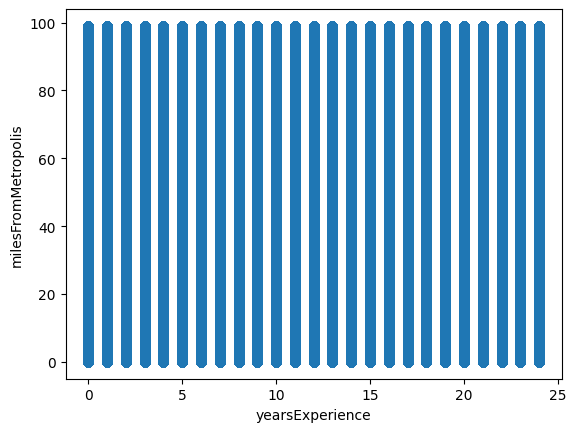

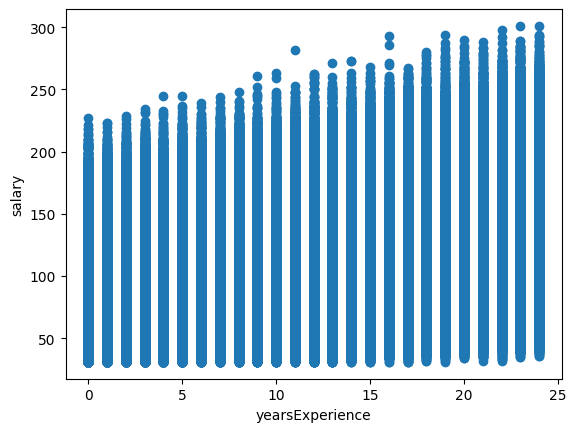

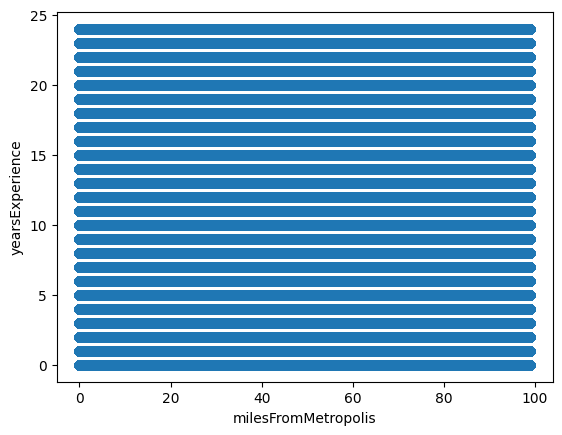

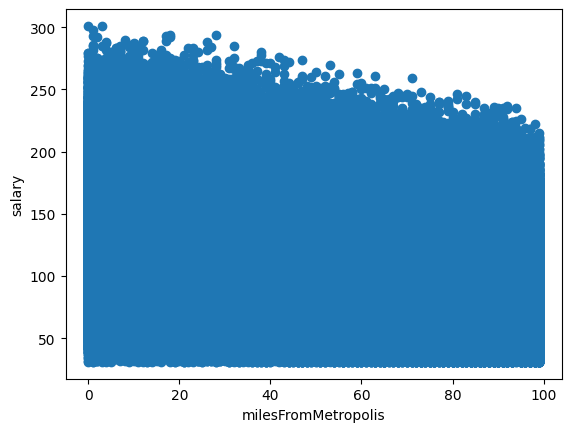

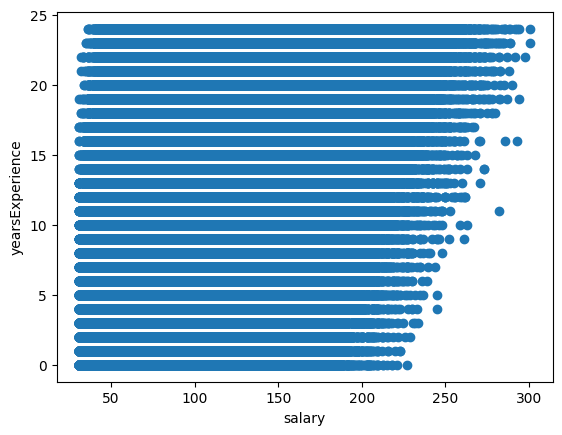

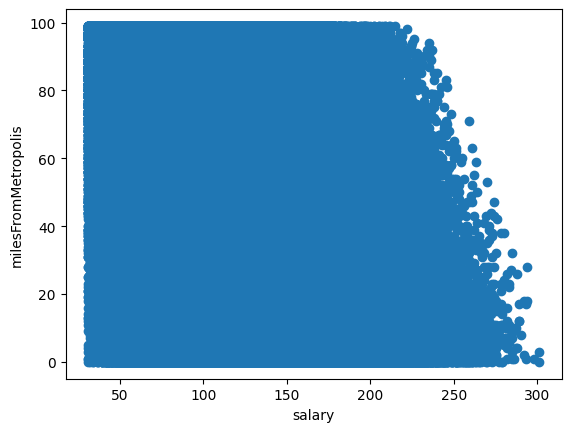

In [29]:
# Iterating through the variable(numerical) list and plotting the scatter-plot

for i in var_list:
  for j in var_list:
    if i != j:
      plot_scatter(i,j)

Result :
1. Increase in yearsExperience results in increase in **range** of salary. They are positively correlated.
2. Increase in milesFromMetropolis results in decrease in **range** of salary, They are negatively correlated.
3. No change occurs in yearsExperience and milesFromMetropolis graph. There is no correlation between these 2 numerical variables/features.

### `Histogram`

array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

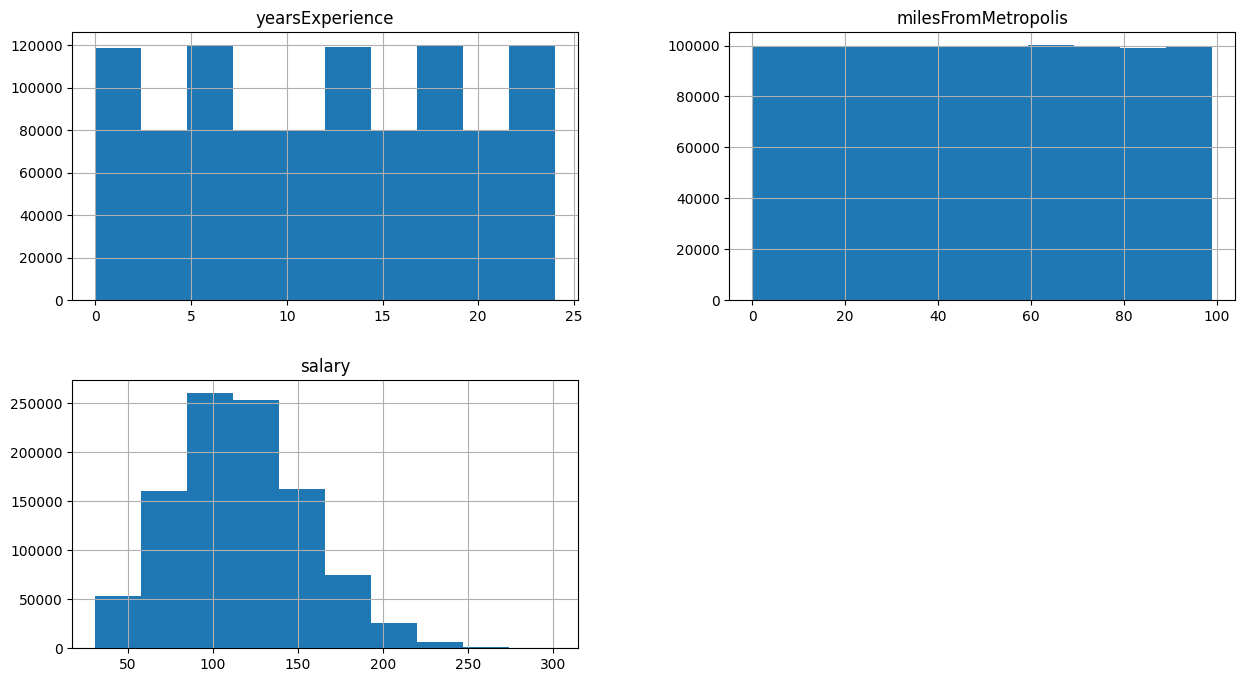

In [30]:
# Histogram using pandas

train_data.hist(figsize = (15,8))

Result :
1. yearsExperience data distribution is symmetric.
2. milesFromMetropolis data distribution is symmetric.
3. salary data distribution is symmetric and unimodal(it has only one peak in distribution). (most probably gaussian distribution)

###   `Box Plot`

Helps in checking the distribution of data in numerical variables.

<Axes: >

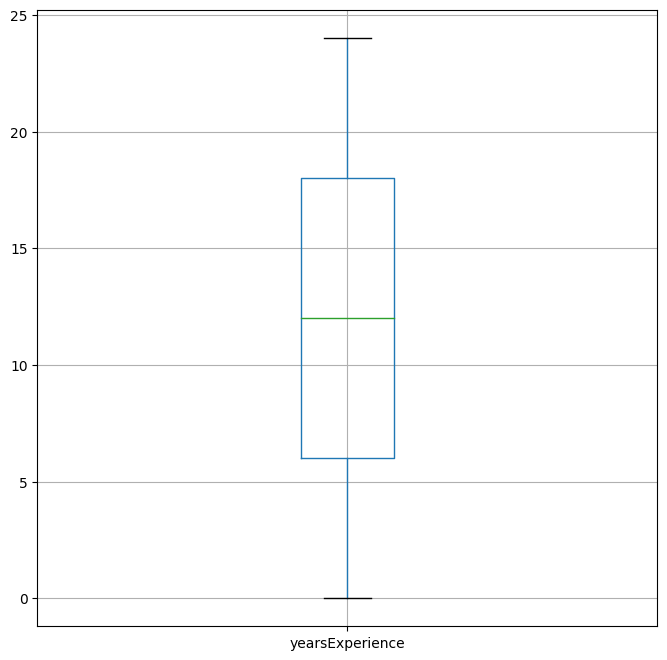

In [31]:
# Box-plot for yearsExperience column

train_data.boxplot(column = 'yearsExperience', figsize = (8,8))

Result :
1. 25% of employees have 0-6 years of experience.
2. Next 25% of employees have 6-12 years of experience.
3. Median is 12 years of experience
4. The next 25% of employees after median values have 12-18 years of Employees.

<Axes: >

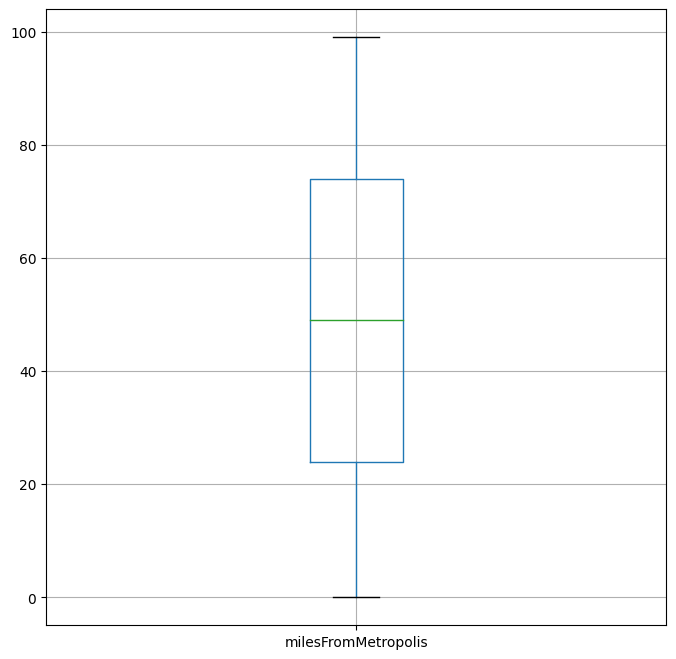

In [32]:
# Box-plot for milesFromMetropolis column

train_data.boxplot(column = 'milesFromMetropolis', figsize = (8,8))

Result :
1. 25 percent of values are below 25(miles).
2. Next 25 percent of values are below 48(miles).
3. Median is 48(miles).
4. Next 25% and final values are below 75.
5. The min value is 0, and the max value is 96.

<Axes: >

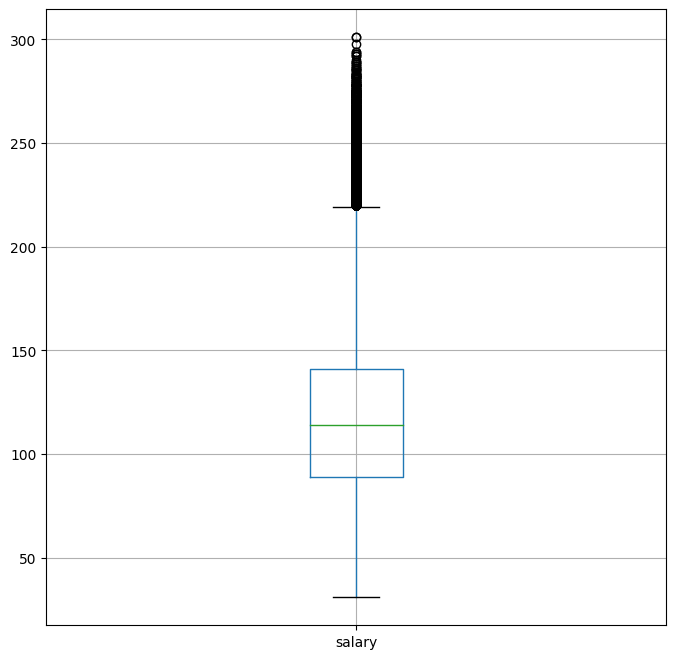

In [33]:
# Box-plot for salary column

train_data.boxplot(column = 'salary', figsize = (8,8))

Result :
1. 25% of employees have salary between range 0 to 88.
2. Next 25% of employees have salary range from 88 to 120.
3. Median Salary is 120.
4. Next 25% of employess have salary range between 120 to 140.
5. Rest 25% of employess have salary range between 140 to 220.
6. The Values above 220 are considered to be outliers.

## `Variance Inflation Factor (VIF)`

1. The Variance Inflation factor quantifies the extent of correlation between one predictor and other predictors in a model. (Takes the combination of features one-by-one and calculate the value of R^2)
2. VIF = 1/(1-R^2)
3. It is used for diagonizing collinearity/multicollinearity.
4. Higher value of R^2 signifies more collinearity. Generally, VIF = 2.5, i.e, if value is near to '2.5' we take it as collinear otherwise not collinear.

In [34]:
# import library for VIF

import statsmodels.api as sm

In [35]:
# Creating dataframe for numerical variables

train_vif = train_data.drop(['jobType','degree','major','industry','salary'], axis=1)

# Target Variable
target = train_data['salary']

# Numerical variables column names
names = ['yearsExperience','milesFromMetropolis']
names

# Dropping the null values
train_vif.dropna(inplace=True)

In [36]:
# Calculating VIF for each feature

for i in range(0, len(names)):
  # Taking 1 column as target variable
  y = train_vif.loc[:, train_vif.columns == names[i]]
  # Taking all other remaining columns as feature variable
  x = train_vif.loc[:, train_vif.columns != names[i]]
  # Firting the OLS model on y and x
  model = sm.OLS(y,x)       # Ordinary Least Square
  results = model.fit()       # Fitting in model, i.e, in OLS methord.
  # R^2 value of results
  rsq = results.rsquared
  # Calculating VIF values
  vif = round(1/(1-rsq),2)
  # printing the result
  print('R-square value of {} column is {} keeping all other columns as features.'.format(names[i],(round(rsq, 2))))
  print('Variance Inflation Factor of {} columns is {}. \n'.format(names[i], vif))

R-square value of yearsExperience column is 0.55 keeping all other columns as features.
Variance Inflation Factor of yearsExperience columns is 2.22. 

R-square value of milesFromMetropolis column is 0.55 keeping all other columns as features.
Variance Inflation Factor of milesFromMetropolis columns is 2.22. 



Results :
* There is collinearity/multicollinearity between the variables as the VIF values is almost upto 2.5.
* yearsExperience and milesFromMetropolis both have collinearity with all the variables.

## `ANOVA Test`

When we want to check relationship between categorical variable and numerical variable, we need to perform ANOVA test.

Normal Assumption Check

* Assumptions for one-way ANOVA test : The samples are rendom and independent samples.
* Now we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.


### `Hypothesis Testing`

In [37]:
# Performing ANOVA test between two variables

def perform_anova_test(x,y):
  # Two variables of interest (one categorical and one numerical)
  train_anova = train_data[[x, y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)

  # qq Probability Plot
  unique_majors = train_anova[x].unique()
  for major in unique_majors:
    stats.probplot(train_anova[train_anova[x] == major][y], dist='norm', plot=plt)
    plt.title('Probability Plot - '+ str(major))
    plt.show()

  # Calculating ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)

  # Creating backbone of ANOVA table
  data = [['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]
  anova_table = pd.DataFrame(data, columns = ['Source of Variation','SS','df','MS','F','p_Value','F_crit'])     # SS -> Sum of Squares  &  MS -> Mean Sum of Squares
  anova_table.set_index('Source of Variation', inplace = True)

  # Calculating SSB and updating ANOVA table
  x_bar = train_anova[y].mean()
  SSB = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSB[y].sum()

  # Calculating SSE and updating ANOVA table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # Calculating SSTR and updating ANOVA table
  SSTR = SSB[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # Updating Degrees of Freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # Calculating MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # Calculating F
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p_Value
  anova_table['p_Value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical
  alpha = 0.05

  # Possible types "right-tailed, left-tailed, two-tailed"
  tail_type = 'two-tailed'
  if tail_type == 'two-tailed':
    alpha /= 2
  anova_table['F_crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA table
  print(anova_table)

  # The p_Value approach
  print('Approach 1 : The p-Value approach to hypothesis testing in the decision rule')
  conclusion = 'Failed to reject the null hypothesis.'
  if anova_table['p_Value']['Between Groups'] <= alpha:
    conclusion = 'Null Hypothesis is rejected.'
  print('F-score is : ', anova_table['F']['Between Groups'], ' and p-Value is : ', anova_table['p_Value']['Between Groups'])
  print(conclusion)

  # The critical Value approach
  print('\n------------------------')
  print('Approach 2 : The critical Value approach to hypothesis testing in the decision rule')
  conclusion = 'Failed to reject the null hypothesis.'
  if anova_table['F']['Between Groups'] > anova_table['F_crit']['Between Groups']:
    conclusion = 'Null Hypothesis is rejected.'
  print('F-score is : ', anova_table['F']['Between Groups'], ' and critical Value is : ', anova_table['F_crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


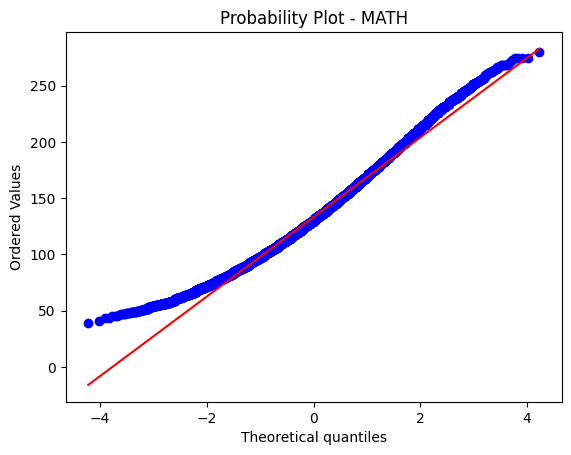

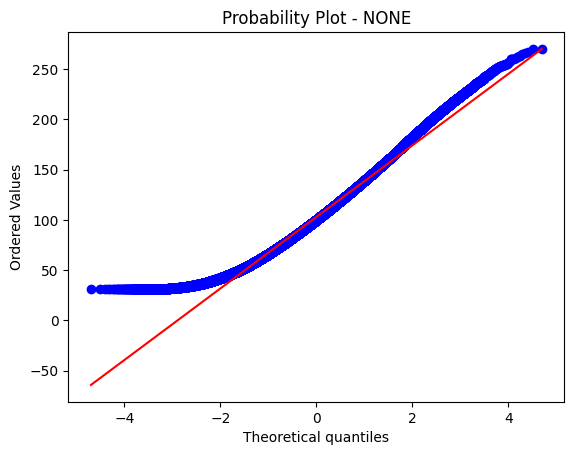

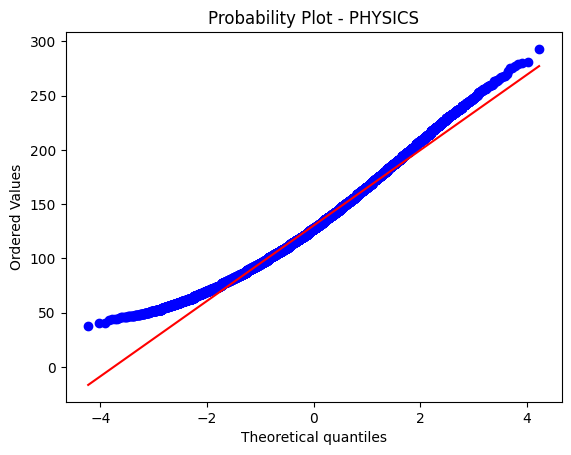

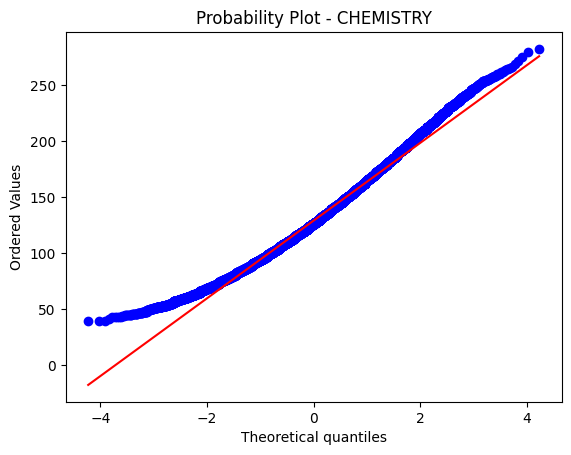

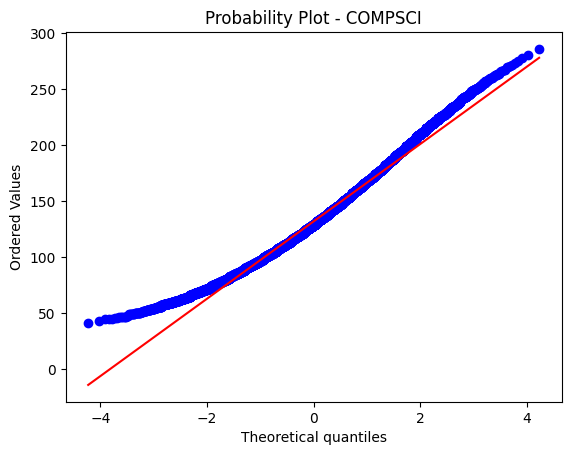

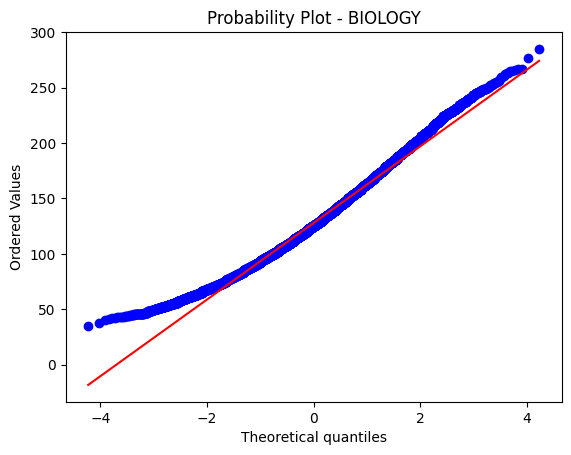

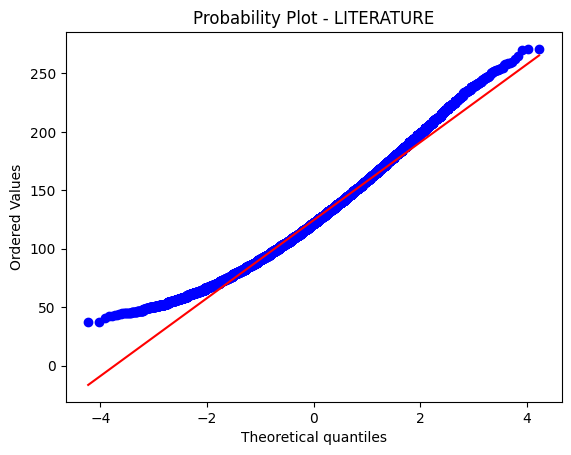

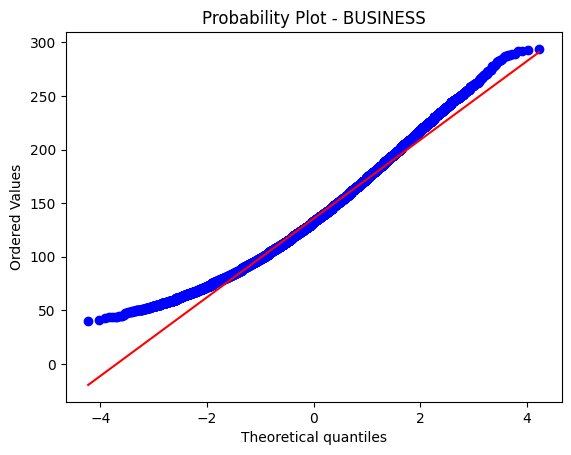

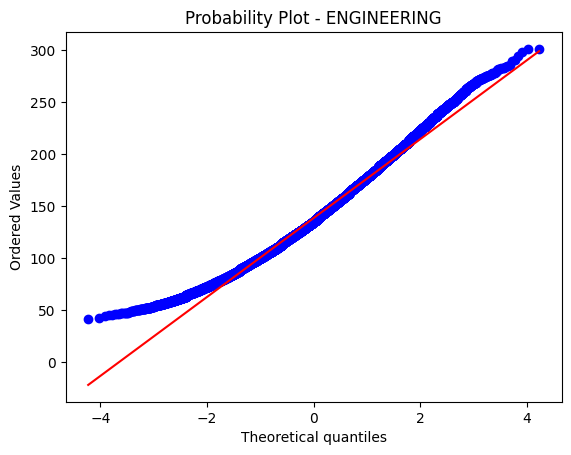

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    p_Value    F_crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  20572.997067846136  and p-Value is :  1.1102230246251565e-16
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  20572.997067846136  and critical Value is :  2.19183093

In [38]:
# ANOVA test between major and salary

perform_anova_test('major','salary')

Result : As null hypothesis is rejected, hence there is a relationship between your major and salary.

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


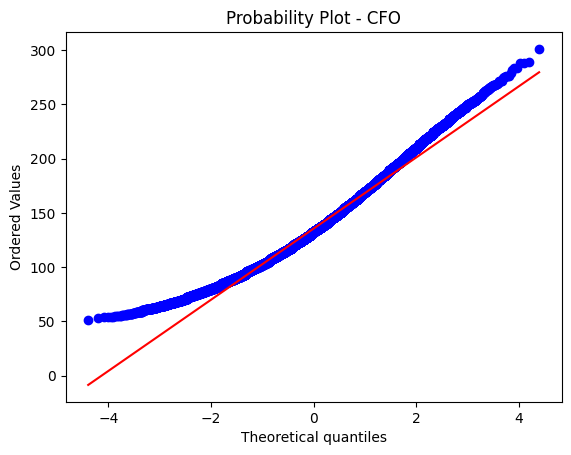

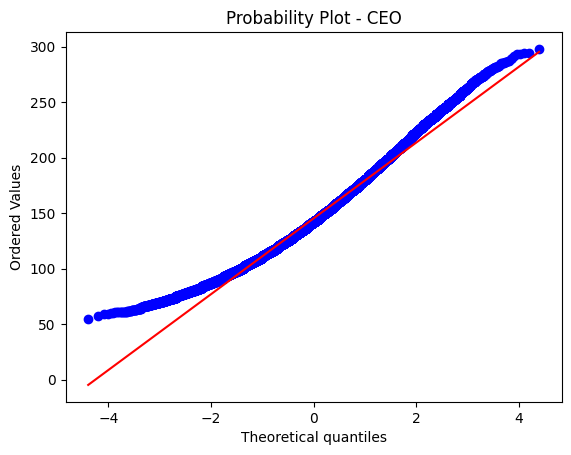

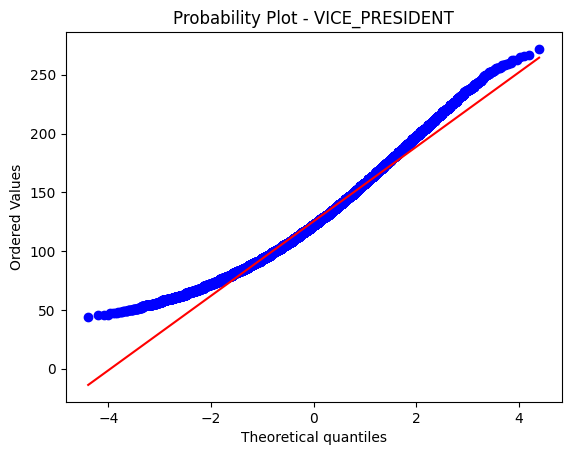

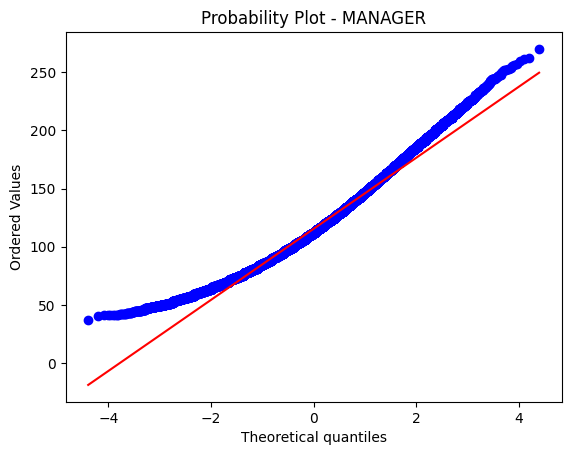

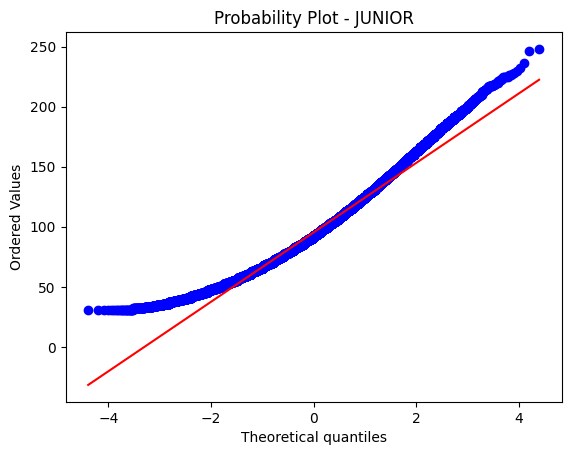

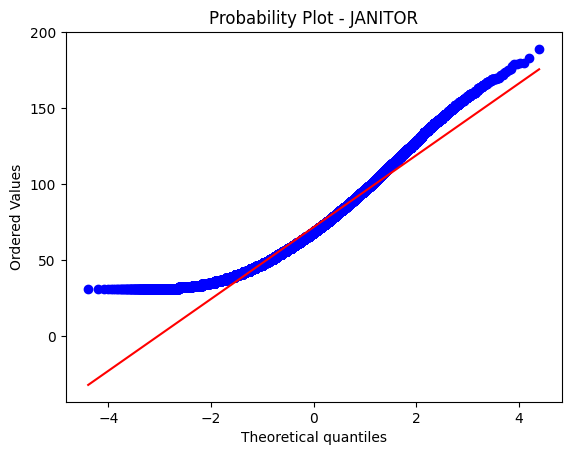

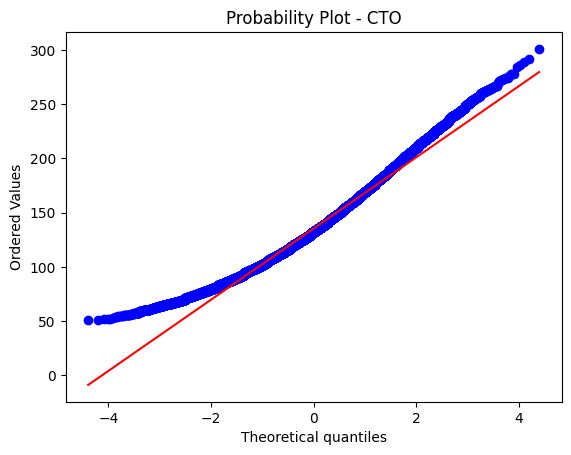

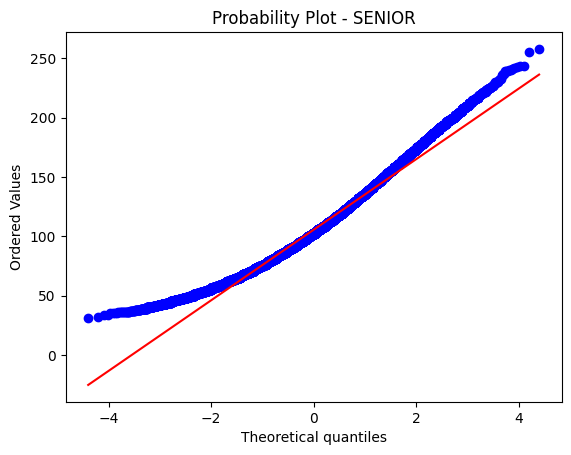

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    p_Value   F_crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  77349.96188255494  and p-Value is :  1.1102230246251565e-16
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  77349.96188255494  and critical Value is :  2.287550380976347

In [39]:
perform_anova_test('jobType','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


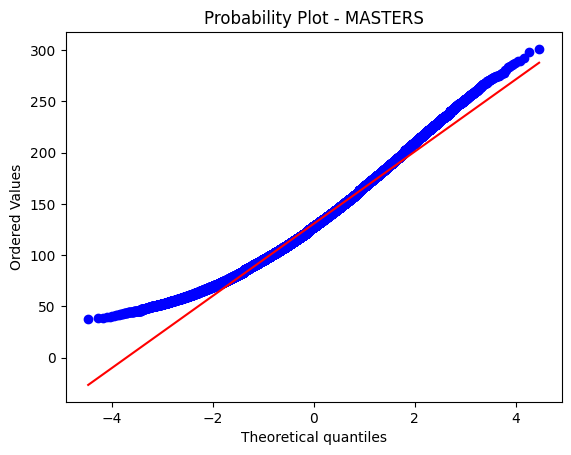

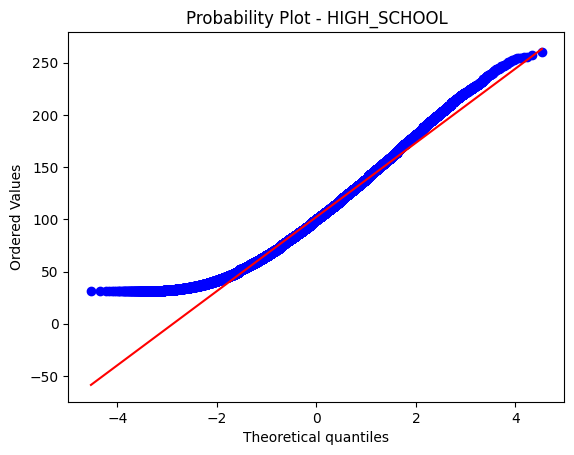

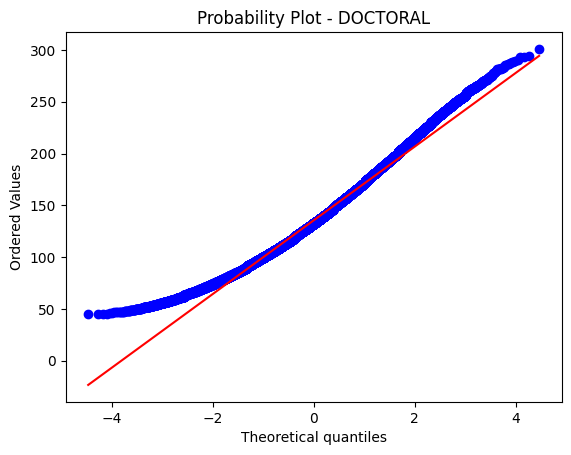

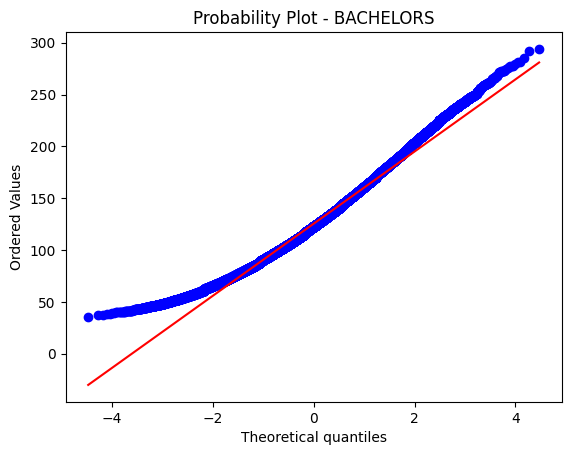

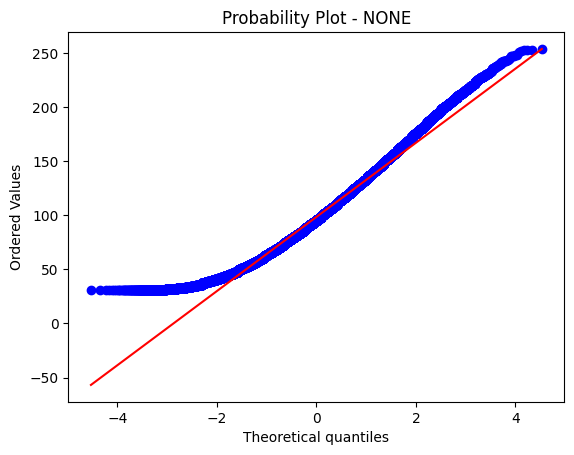

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    p_Value    F_crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  47107.26230562572  and p-Value is :  1.1102230246251565e-16
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  47107.26230562572  and critical Value is :  2.7858344627

In [40]:
perform_anova_test('degree','salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


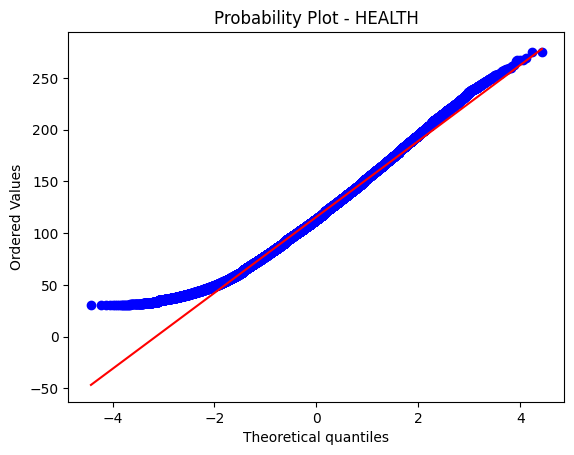

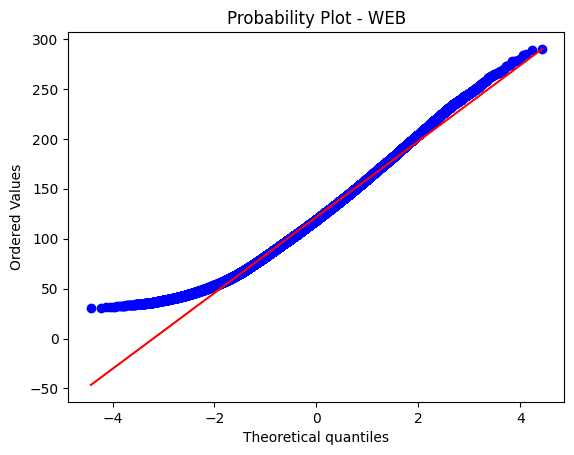

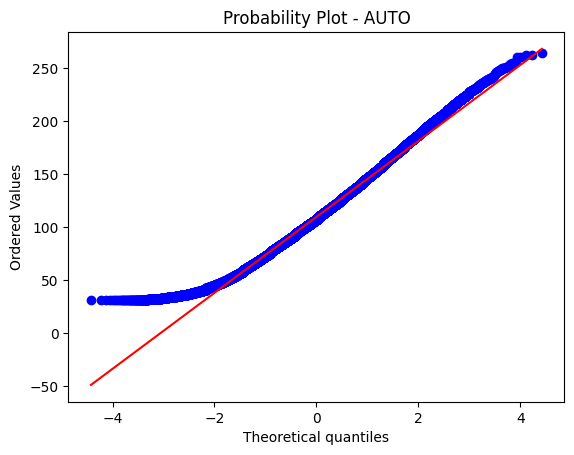

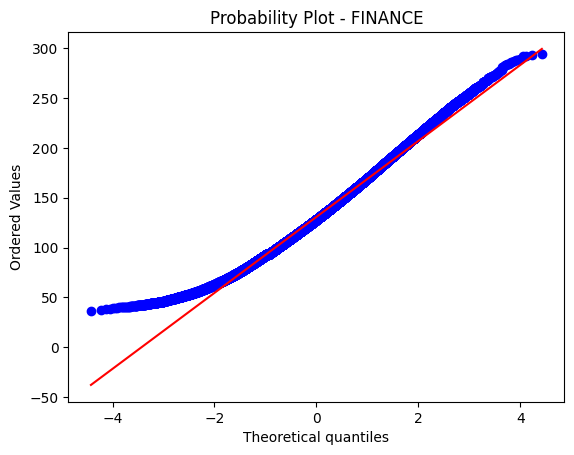

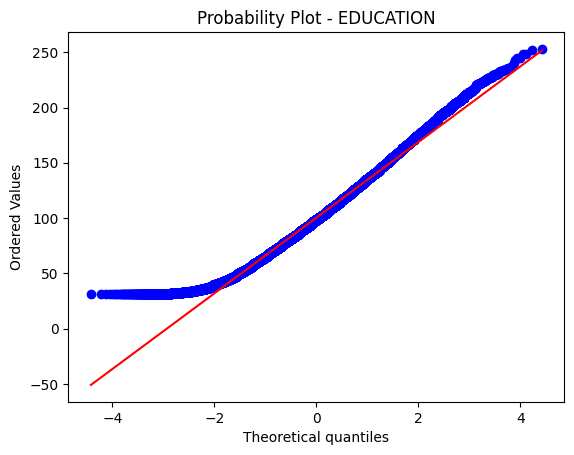

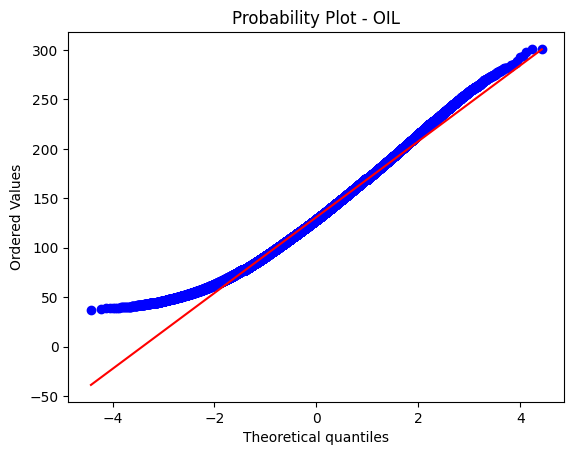

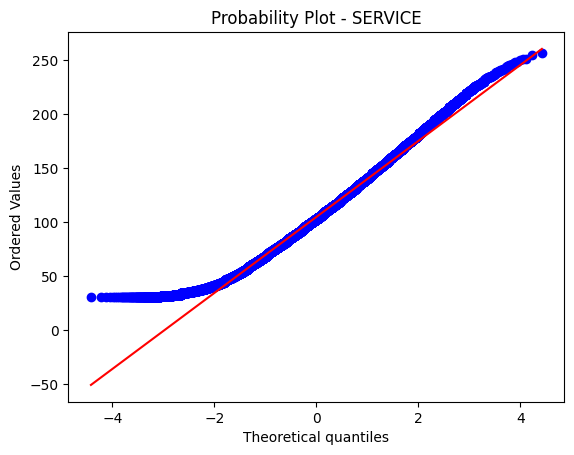

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    p_Value    F_crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  15497.25228748466  and p-Value is :  1.1102230246251565e-16
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  15497.25228748466  and critical Value is :  2.4082418357623516
Nul

In [41]:
perform_anova_test('industry','salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


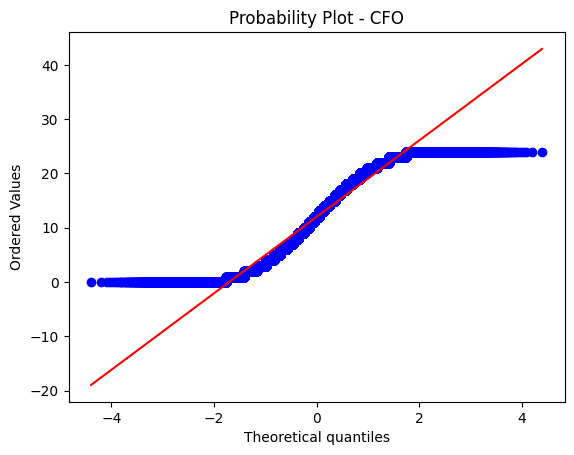

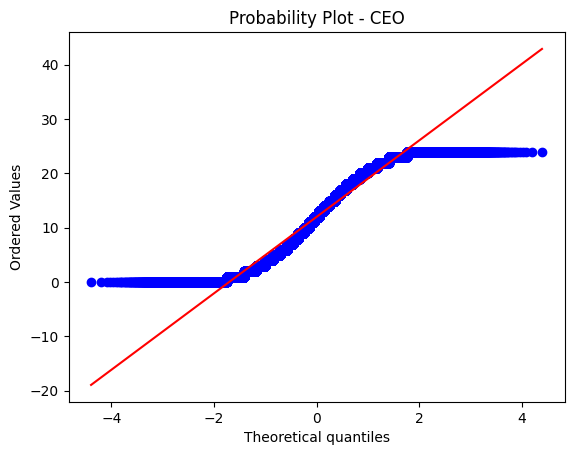

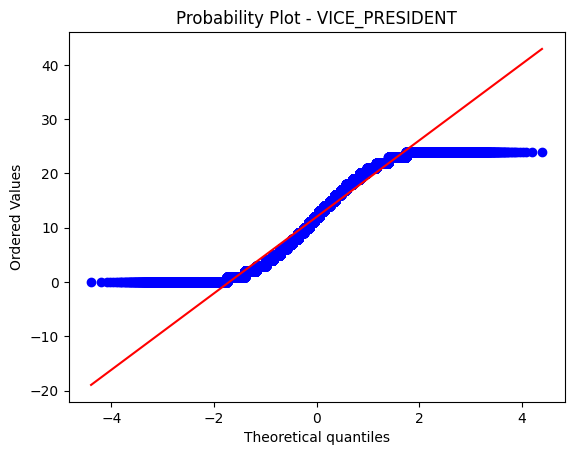

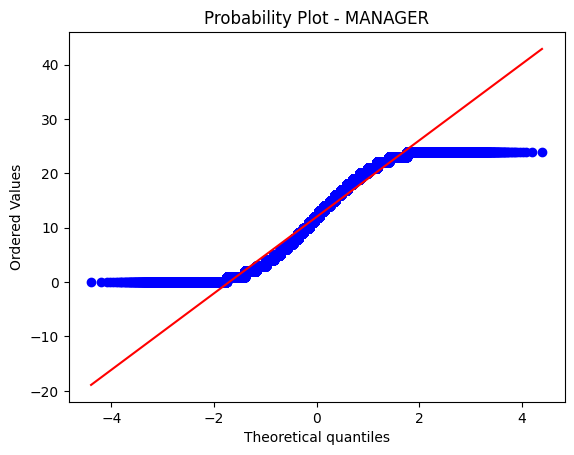

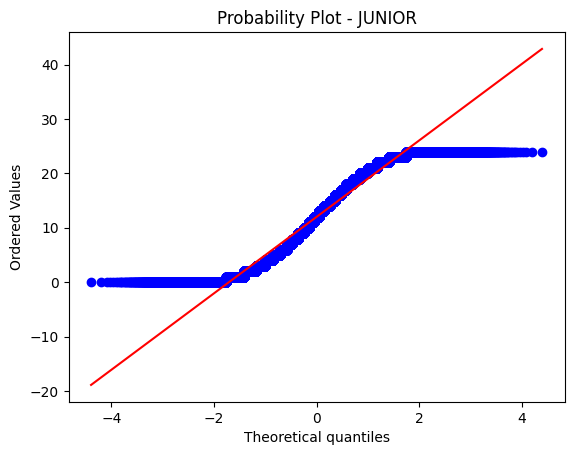

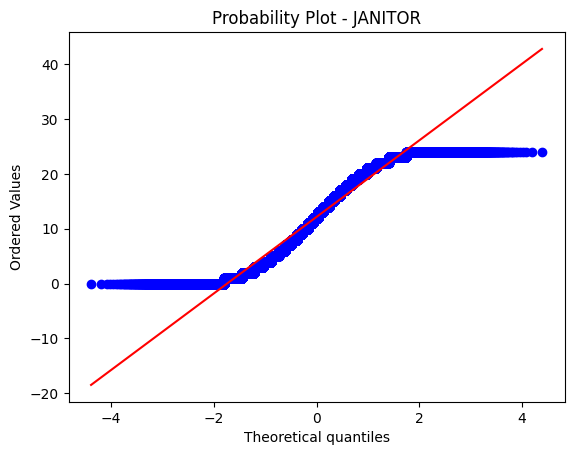

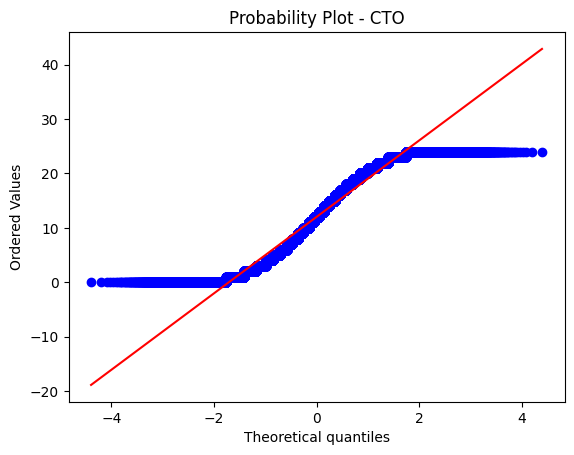

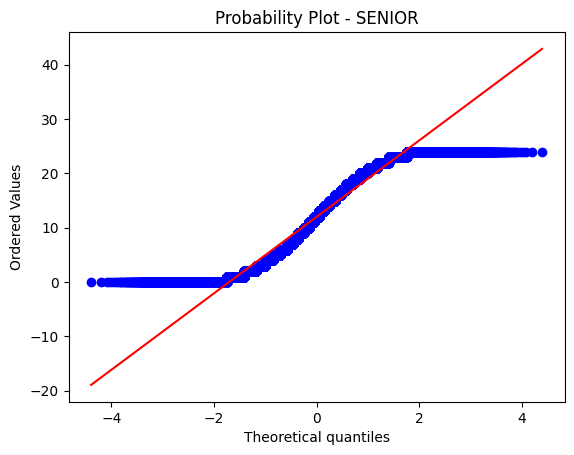

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F p_Value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F_crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  7.262147745370608  and p-Value is :  9.905482767358365e-09
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  7.262147745370608  and critical Value is :  2.2875503809763478
Null Hypothesis is rejected.


In [42]:
perform_anova_test('jobType','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


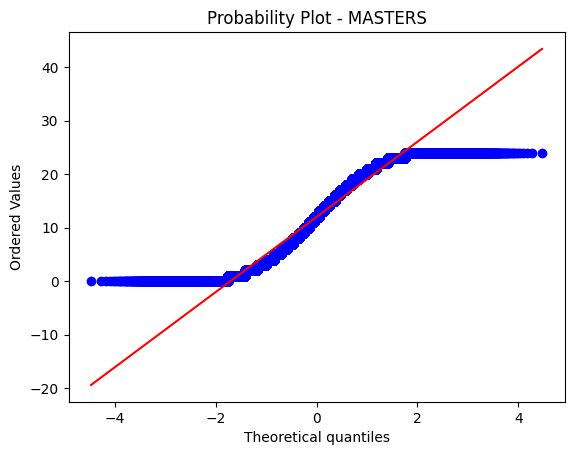

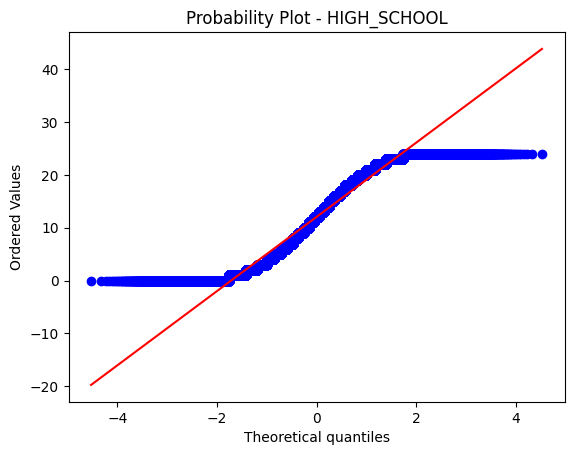

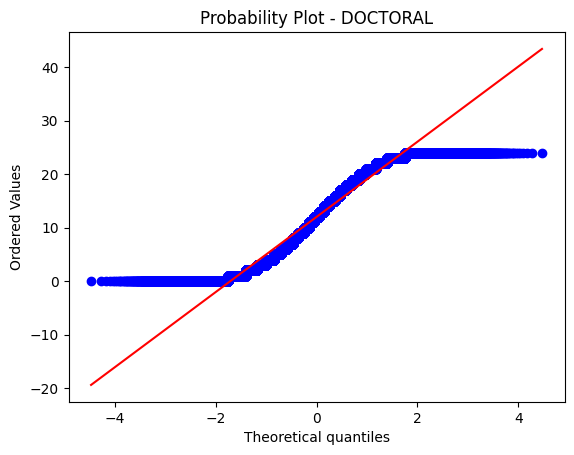

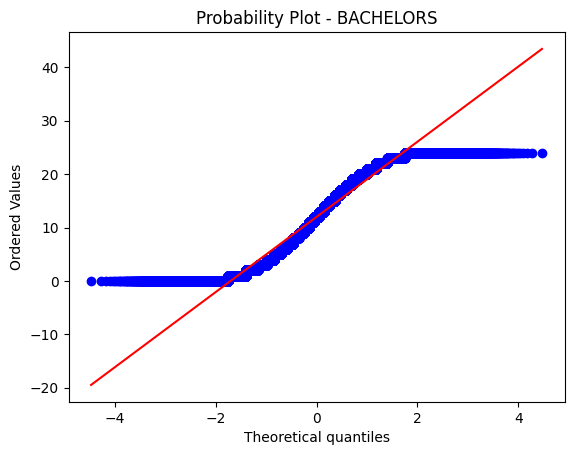

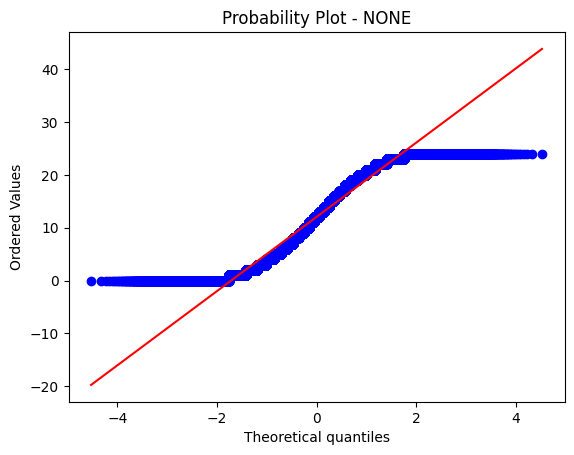

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  p_Value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F_crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  3.2150294466062923  and p-Value is :  0.011980261991255126
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  3.2150294466062923  and critical Value is :  2.7858344627125904
Null Hypothesis is rejected.


In [43]:
perform_anova_test('degree','yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


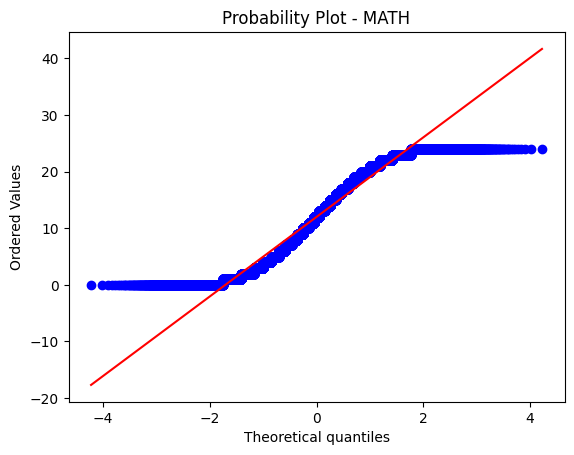

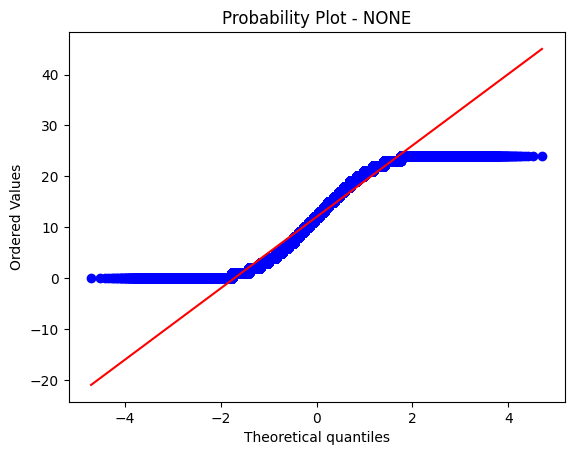

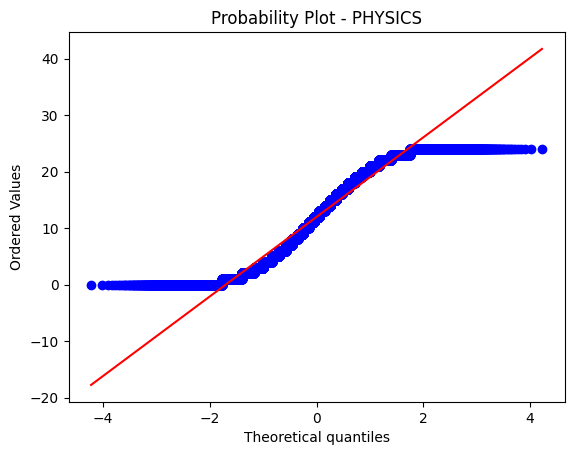

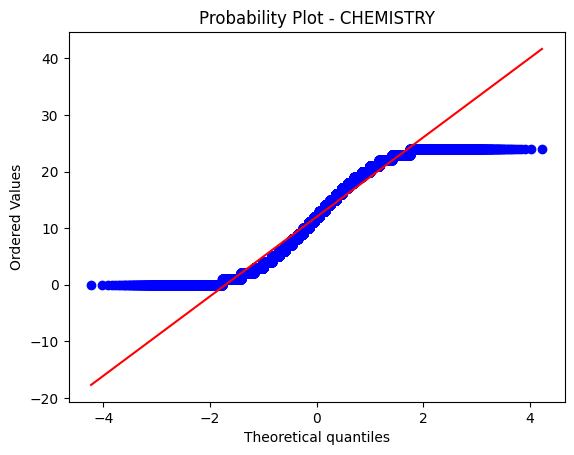

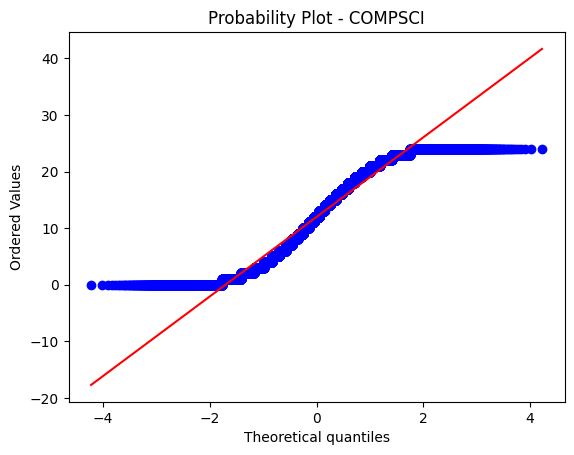

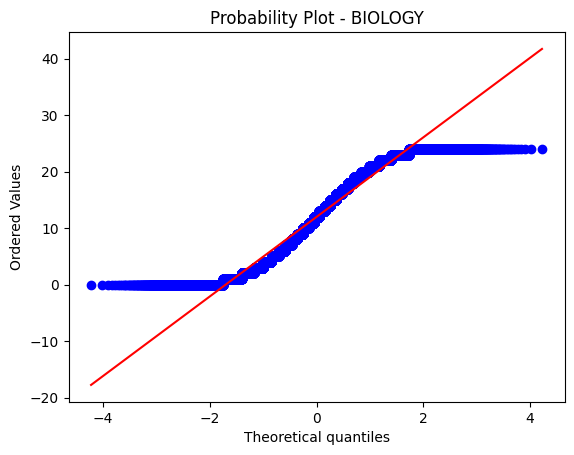

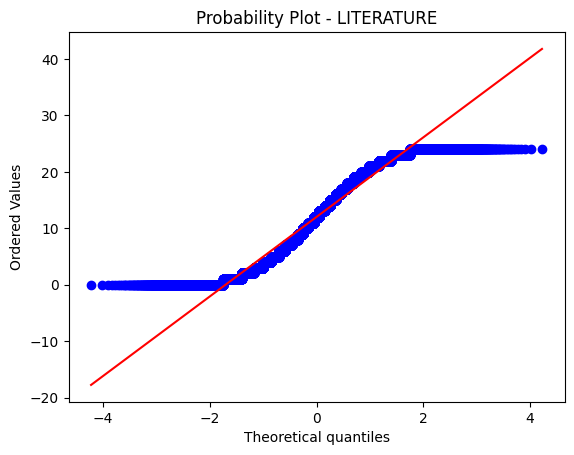

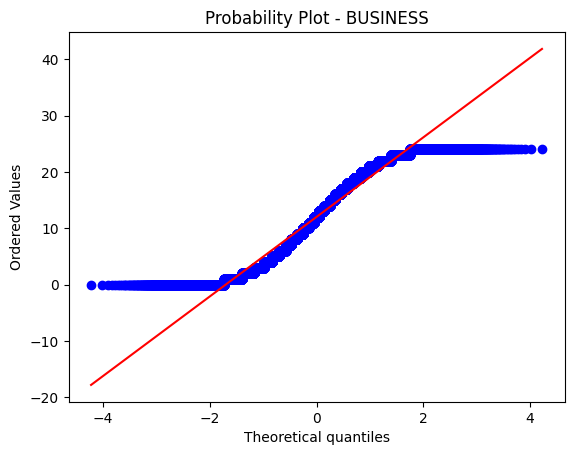

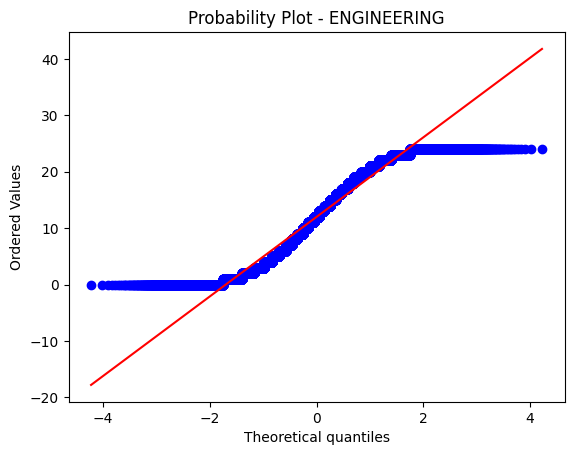

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  p_Value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F_crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  1.3626964191505286  and p-Value is :  0.2073404736822877
Failed to reject the null hypothesis.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  1.3626964191505286  and critical Value is :  2.1918309394698885
Failed to reject the null hypoth

In [44]:
perform_anova_test('major','yearsExperience')

Result : As the ANOVA test has failed to reject the null hypothesis, there is no relationship between major and yearsExperience.

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


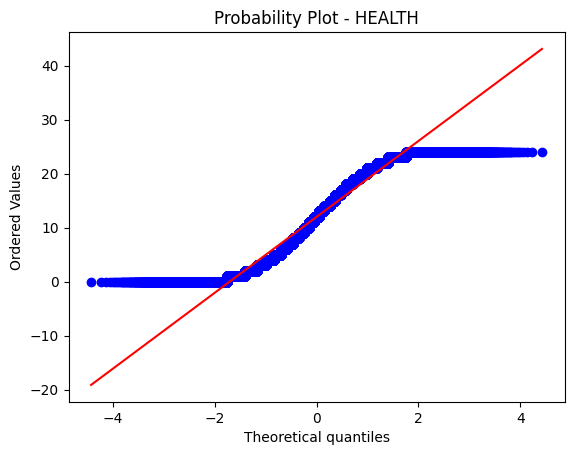

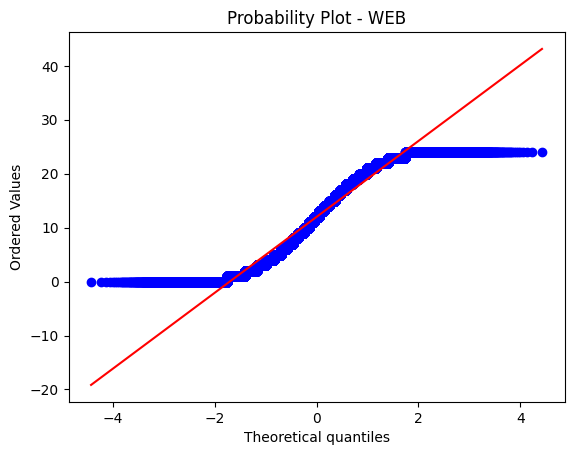

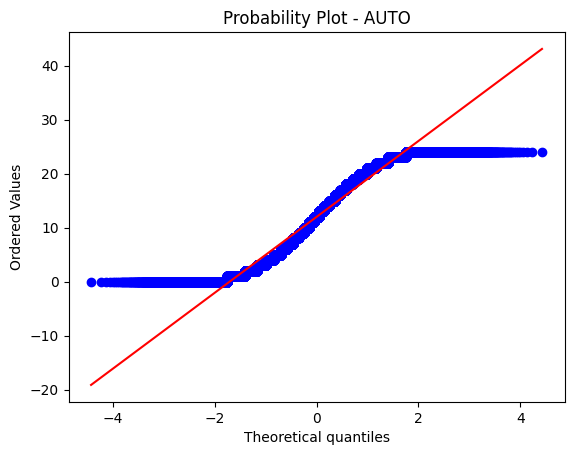

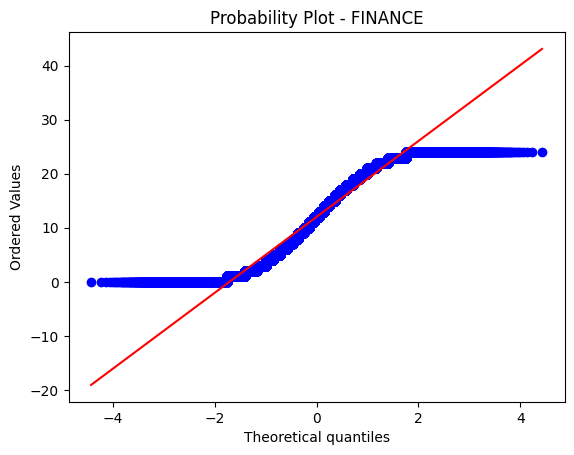

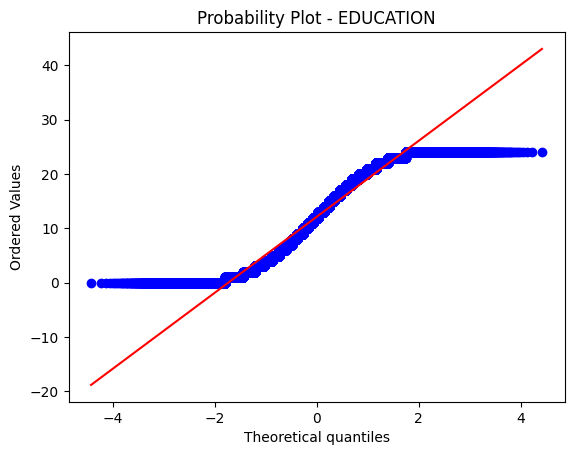

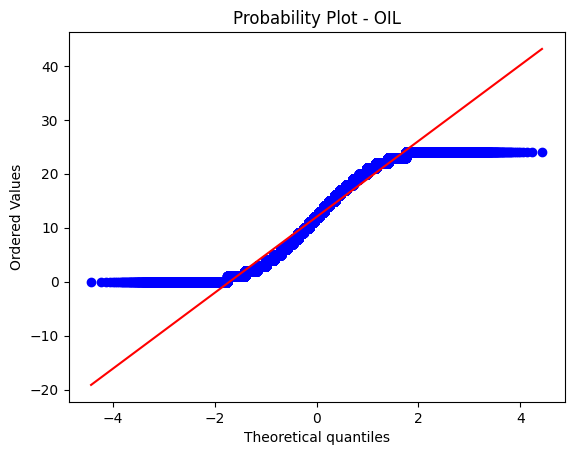

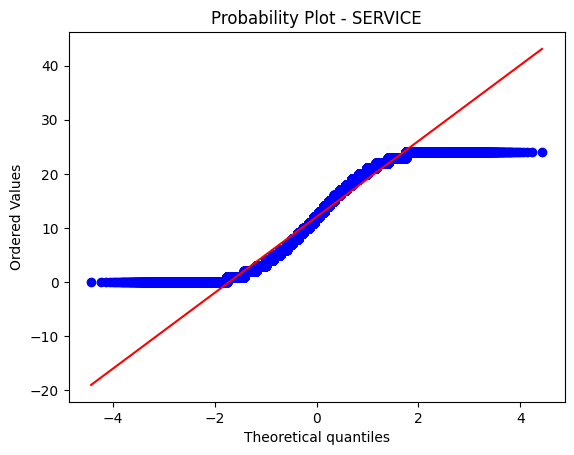

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   p_Value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F_crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1 : The p-Value approach to hypothesis testing in the decision rule
F-score is :  5.4341908776699475  and p-Value is :  1.249142777282053e-05
Null Hypothesis is rejected.

------------------------
Approach 2 : The critical Value approach to hypothesis testing in the decision rule
F-score is :  5.4341908776699475  and critical Value is :  2.4082418357623516
Null Hypothesis is rejected.


In [45]:
perform_anova_test('industry','yearsExperience')

### `Dendrogram`

It shows the relationship between two variables.

<function matplotlib.pyplot.show(close=None, block=None)>

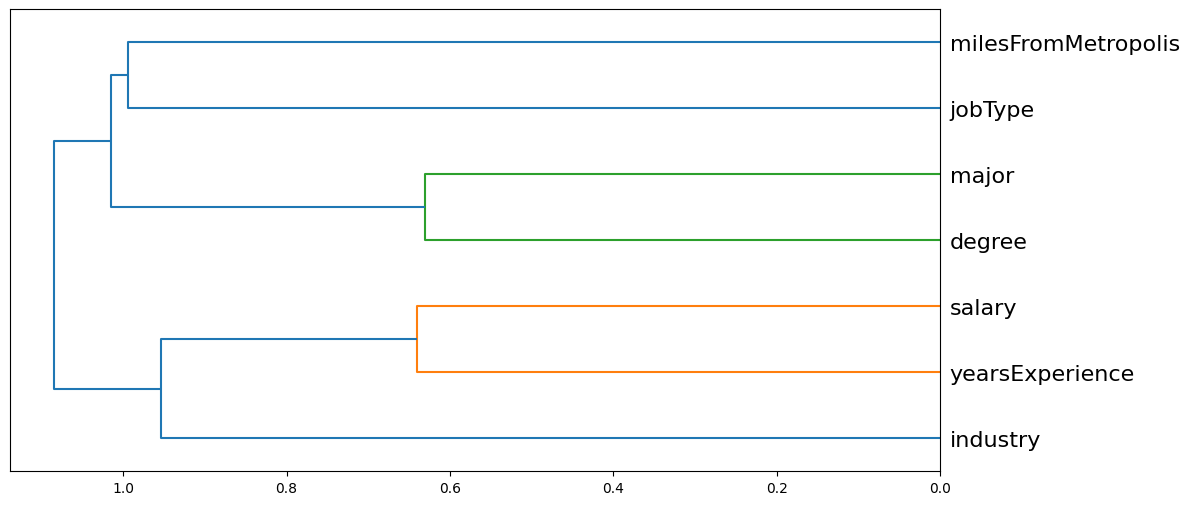

In [50]:
# Plotting a dendrogram on the features of the dataset(a sample of 50000 values)

X = train_data.sample(50000)

import scipy
from scipy.cluster import hierarchy as hc     # creating a hierarchy between features

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize=(12,6))
dendrogram = hc.dendrogram(z, labels = X.columns, orientation = 'left', leaf_font_size = 16)
plt.show

Result : Strongly correlated features
1. major and degree
2. salary and yearsExperience

### `Scaling the Data`

Since there are no missing values and all the data are distributed equally, we can start converting the categorical values to numerical.

Why Scaling is important :
1. It reduces the variance, i.e, when data is highly distributed, then scaling helps in normalzing or standardizing our data.
2. Most of the times, the data contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this becomes a problem.

In [52]:
# Helper functions for scaling all the numerical data using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

def scale_data(df, col):
  scaler = MinMaxScaler()
  df[col] = scaler.fit_transform(df[col])
  return df

In [53]:
# list of columns to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data, col_train)

## `Modelling`

### `One-Hot-Encoding`

one-hot-encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [54]:
# Importing OneHotEncoder for encoding the categorical data

from sklearn.preprocessing import OneHotEncoder as enc

# Class for containing all the functionality required for OneHotEncoding

class OneHotEncoder(enc):

  def __init__(self, **kwargs):
    super(OneHotEncoder, self).__init__(**kwargs)
    self.fit_flag = False

  # helper function to fit data
  def fit(self, X, **kwargs):
    out = super().fit(X)
    self.fit_flag = True
    return out

  # helper function to perform data
  def transform(self, X, **kwargs):
    sparse_matrix = super(OneHotEncoder, self).transform(X)
    new_columns = self.get_new_columns(X=X)
    d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
    return d_out

  # helper function to fit and transform data
  def fit_transform(self, X, **kwargs):
    self.fit(X)
    return self.transform(X)

  # helper function to get new column names after fitting and transforming data
  def get_new_columns(self, X):
    new_columns = []
    for i, column in enumerate(X.columns):
      j = 0
      while j < len(self.categories_[i]):
        new_columns.append(f'{column}{self.categories_[i][j]}')
        j += 1
    return new_columns

In [55]:
# Split the labels and targets

train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'], axis = 1)
train_Y = train_data['salary']

# Features
train_X.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [56]:
# Target

train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [57]:
# passing features dataframe for one hot encoding process

encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616


In [58]:
# importing sklearn library for splitting train dataset into train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size = 0.2, random_state = 42)

In [59]:
# importing necessary libraries for getting metrics of models

import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# function for calculating RMSE
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

# function for calculating all the relevant metrics
def print_score(m):
  res = [rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test), Y_test),
         m.score(X_train, Y_train), m.score(X_test, Y_test),
         median_absolute_error(m.predict(X_train), Y_train), median_absolute_error(m.predict(X_test), Y_test),
         metrics.mean_absolute_error(m.predict(X_train), Y_train), metrics.mean_absolute_error(m.predict(X_test), Y_test)]

  print('RMSE-train : ' + str(res[0]) + '\nRMSE-test : ' + str(res[1]) + '\nScore-train : ' + str(res[2]) + '\nScore-test : ' + str(res[3]) +
        '\nMedAE-train : ' + str(res[4]) + '\nMedAE-test : ' + str(res[5]) + '\nMeanAE-train : ' + str(res[6]) + '\nMeanAE-test : ' + str(res[7]), '\n')

In [60]:
# Visualize importance of all the features in the dataset for the preparation

def visualize_importance(feature_importances, feat_train_df):

  # creating dataframe for feature name and feature importance
  feature_importance_df = pd.DataFrame()

  _df = pd.DataFrame()
  _df['feature_importance'] = feature_importances
  _df['column'] = feat_train_df.columns
  feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index = True)

  # grouping all data and sorting in descending order
  order = feature_importance_df.groupby('column').sum()[['feature_importance']].sort_values('feature_importance', ascending = False).index[:50]

  # plotting feature importance data using boxplot
  fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
  sns.boxenplot(data = feature_importance_df, x = 'feature_importance', y = 'column', order = order, ax = ax, palette = 'viridis', orient = 'h')
  ax.tick_params(axis = 'x', rotation = 0)
  ax.set_title('Importance')
  ax.grid()
  fig.tight_layout()
  return fig, ax

### `Linear Regression`

RMSE-train : 19.622874517055383
RMSE-test : 19.643956425620253
Score-train : 0.7404398482268795
Score-test : 0.7396587855537952
MedAE-train : 13.763671875
MedAE-test : 13.765625
MeanAE-train : 15.866709863753355
MeanAE-test : 15.88182843865909 



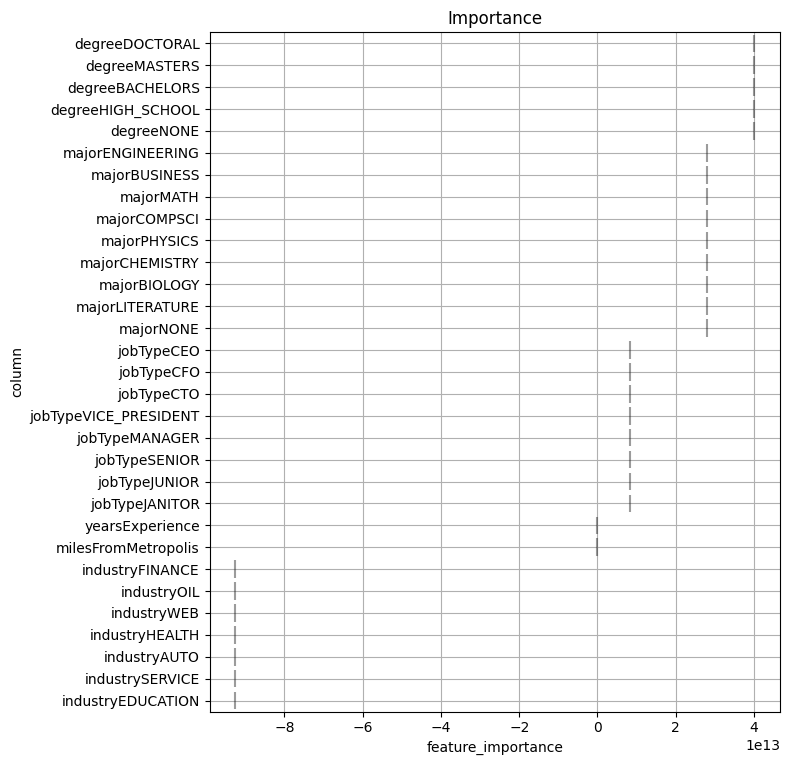

In [61]:
# Fitting a linear regression model to the train dataset

# Importing linear regression and Instantiating it.
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

# Fit the model of the data
lModel.fit(X_train, Y_train)

# Printing score of the model
print_score(lModel)

# Visualizing the importance of features
fig, ax = visualize_importance(lModel.coef_, train_X)

### `Random Forest Regressor`

Random forest is an ensemble learning algorithm capable of both regression and classification with the help of multiple decision trees and a technique called 'bagging'.


RMSE-train : 20.00794066812411
RMSE-test : 20.563264118037907
Score-train : 0.7301530288150955
Score-test : 0.7147214557807342
MedAE-train : 13.090000000000003
MedAE-test : 13.950000000000003
MeanAE-train : 15.803277497763398
MeanAE-test : 16.444584586517273 



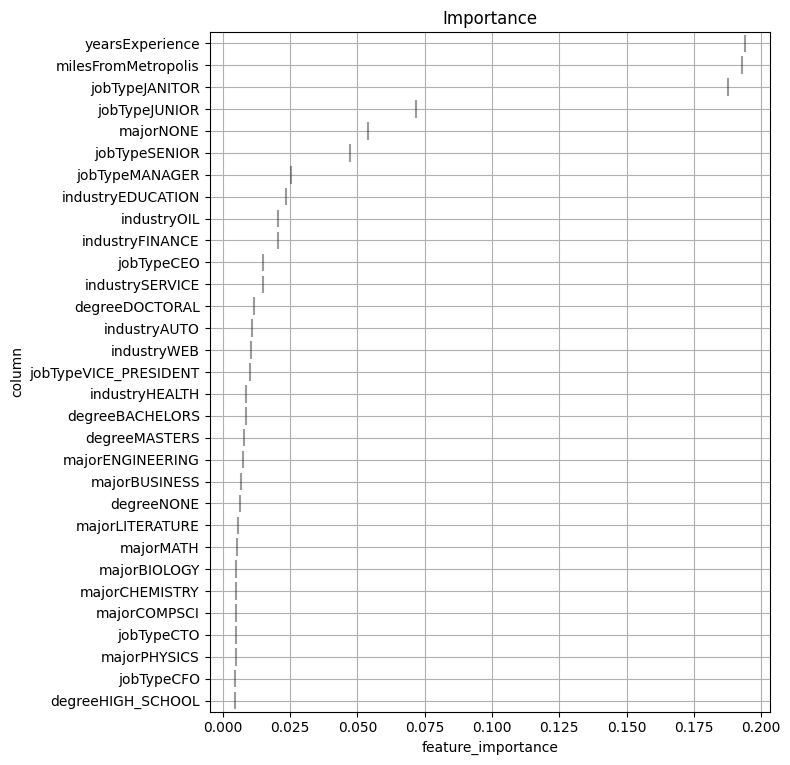

In [62]:
# Fitting a Random Forest Regressor Model to the train dataset

# Importing Random Forest Regressor and Instantiating it.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Fitting the model to the data
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(rf)

# Visualizing the importance of features
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:50000])

### `KNeighbors Regressor`

* KNN Regressor is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observation in the same neighbourhood.
* The size of the neighbourhood needs to be set by the analyst or can be choosen using cross-validation to select the size that minimizes the mean-squared error.

In [63]:
# Fitting a K-nearest neighbour regressor model to the train dataset

# Importing KNN Regressor model and Inatantiating it.
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()

# Fitting the model to the data
knnr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# Printing the score of the model
print_score(knnr)

RMSE-train : 23.90826429210899
RMSE-test : 23.99436837256434
Score-train : 0.6146912582647375
Score-test : 0.6115781554381271
MedAE-train : 15.199999999999989
MedAE-test : 15.200000000000003
MeanAE-train : 18.621275929216402
MeanAE-test : 18.682495113026913 



### `Gradient Boosting Regressor`

* Gradient Boosting Regressor Algorithm is generally used when we want to decrease the Bias Error. It builds an addictive model in a forward stage-wise fashion and allows for the optimization of arbitiary differentiable loss functions.
* In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-train : 19.434070558906622
RMSE-test : 19.45338296702291
Score-train : 0.7454106006379883
Score-test : 0.7446856204616022
MedAE-train : 13.653401740068446
MedAE-test : 13.690755245712722
MeanAE-train : 15.704484803642869
MeanAE-test : 15.721624731739182 



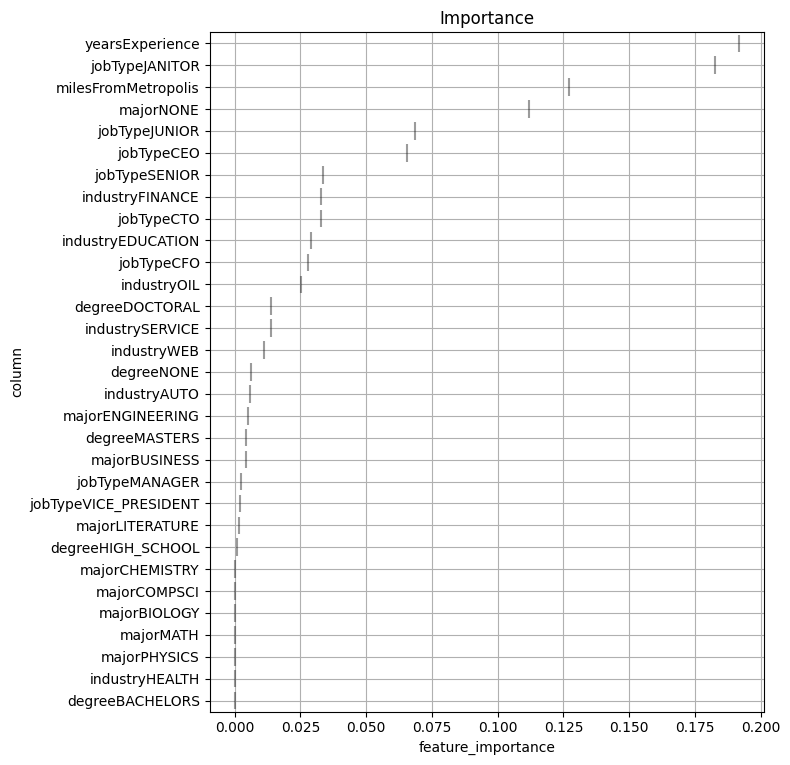

In [64]:
# Fitting a Gradient Boosting Regressor model to the train dataset

# Importing GradientBoostingRegressor and Instantiating it

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

# Fitting the data in the model
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(GBR)

# Visualizing the importance of feaures
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])

### `Decision Tree Regressor`

* Decision tree builds regression or classification models in the form of a tree structure.
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and a leaf nodes.

In [65]:
# Fitting a Decision Tree Regressor model to the train dataset

# Importing DecisionTreeRegressor and Instantiating it.
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

# Fitting the data in the model
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing score of the model
print_score(DTR)

RMSE-train : 26.807549911312364
RMSE-test : 27.744256944545356
Score-train : 0.5155744817023975
Score-test : 0.48068460422905
MedAE-train : 16.0
MedAE-test : 18.0
MeanAE-train : 20.247686618097546
MeanAE-test : 21.619247155531045 



### `AdaBoost Regressor`

An AdaBoost Regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

RMSE-train : 25.287658300189076
RMSE-test : 25.277775074767714
Score-train : 0.5689476719214859
Score-test : 0.5689152173790355
MedAE-train : 19.287573526006213
MedAE-test : 19.31337725580063
MeanAE-train : 21.050875734336184
MeanAE-test : 21.047537744235846 



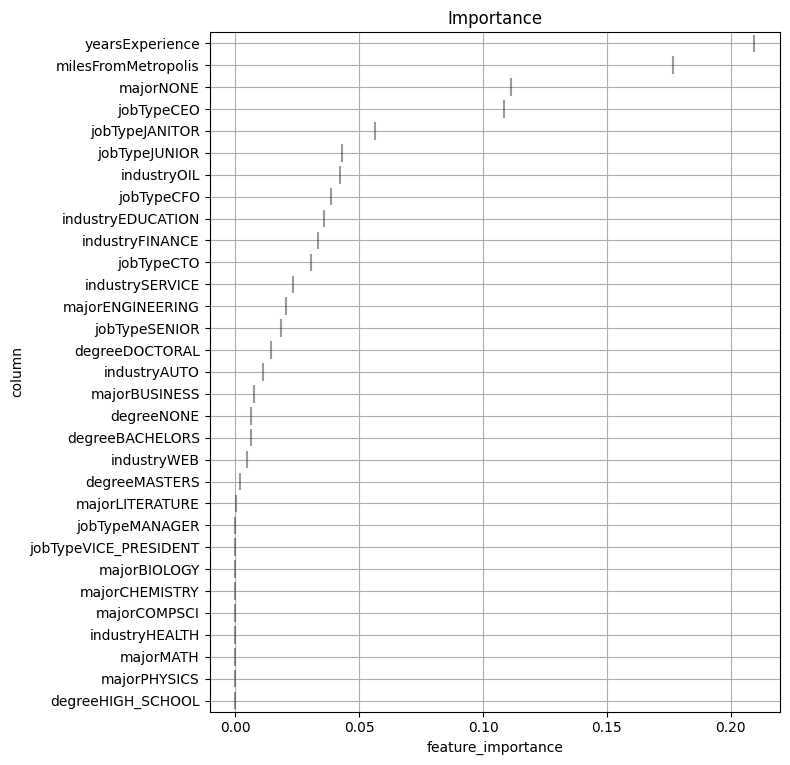

In [66]:
# Fitting a AdaBoost Regressor model to the train dataset

# Importing AdaBoostRegressor and Instantiating it.
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor()

# Fitting the data to the model
ABR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(ABR)

# Visualizing the importance of features
fig, ax = visualize_importance(ABR.feature_importances_, train_X.iloc[1:50000])

### `XGBoost`

* XGBoost is an ensemble learning method. Sometimes,it may not be sufficient to rely upon the results of just one machine learning model.
* Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated outputs from relevant models.

RMSE-train : 19.320813079472693
RMSE-test : 19.45983722223872
Score-train : 0.7483693358169441
Score-test : 0.7445161756371943
MedAE-train : 13.448640823364258
MedAE-test : 13.562435150146484
MeanAE-train : 15.58870404436903
MeanAE-test : 15.712511363939369 



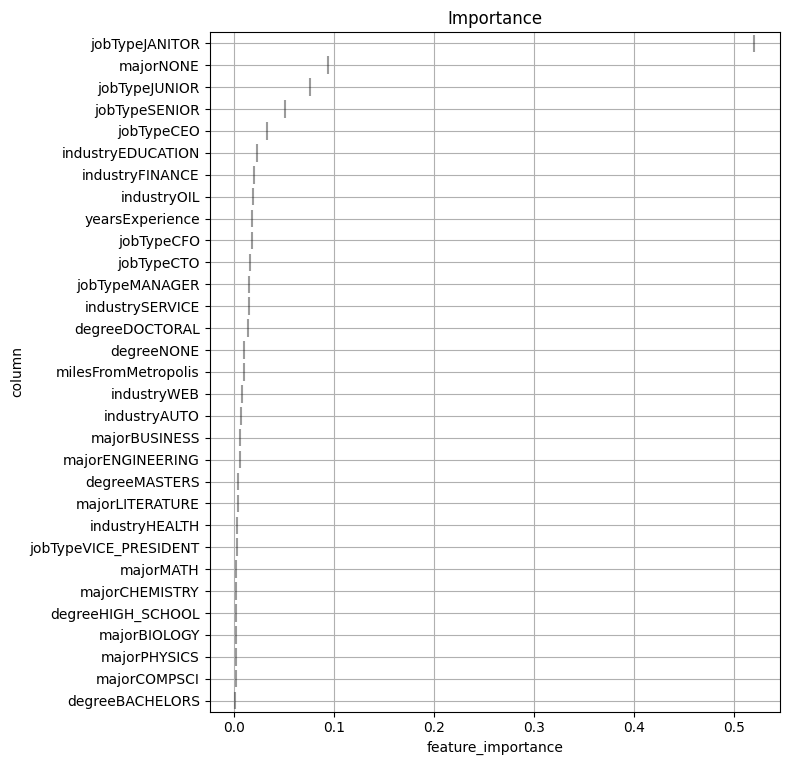

In [67]:
# Fitting XGBoost Regressor model to the train dataset

# Importing XGBoost Regressor Model and Instantiating it.
from xgboost import XGBRegressor
xgbr = XGBRegressor()

# Fitting the model to the data
xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(xgbr)

# Visualizing the importance of features
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:50000])

### `Light Gradient Boosting Machine`

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 49999, number of used features: 31
[LightGBM] [Info] Start training from score 116.436469
RMSE-train : 19.03890857245953
RMSE-test : 19.089276641584313
Score-train : 0.7556587098031465
Score-test : 0.7541535475657066
MedAE-train : 13.439673664930275
MedAE-test : 13.47788739433964
MeanAE-train : 15.43915448459656
MeanAE-test : 15.48228654732492 



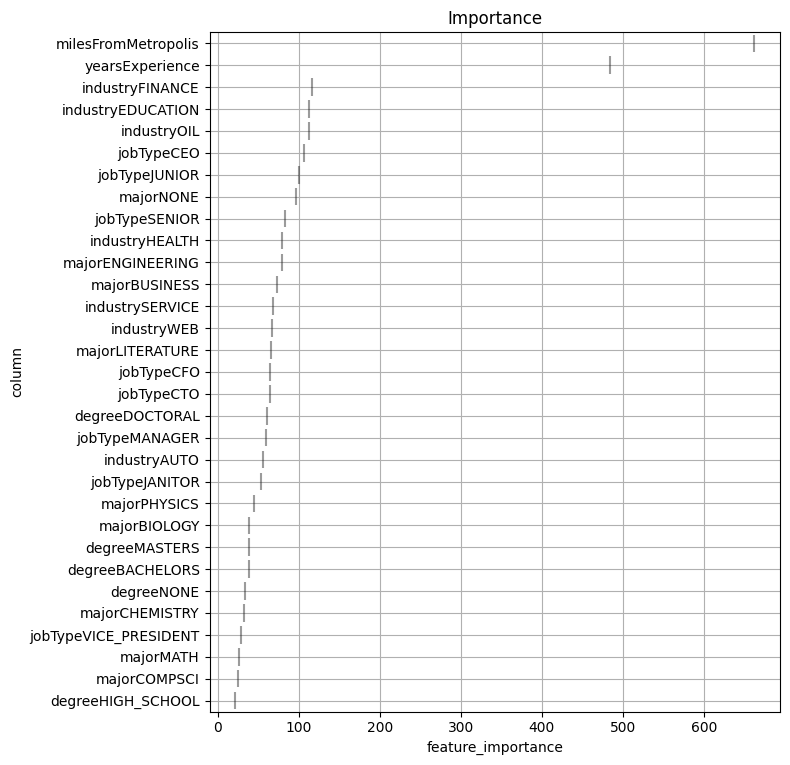

In [68]:
# Fitting a lightgbm Regressor model to the train dataset

# Importing lightgbm and Instantiating it.
import lightgbm as lgbm
lg = lgbm.LGBMRegressor()

# Fitting the model to the data
lg.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(lg)

# Visualizing the importance of features
fig, ax = visualize_importance(lg.feature_importances_, train_X.iloc[1:50000])

## `Comparing All the Models based on Metrics`

In [69]:
def compare_models(models, names, X_train, y_train, X_test, y_test):
  # Importing the libraries we need
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split

  # Now we create a list with the objects
  data = {'Metric':['rmse','MedAE','MAE','R-squared']}
  df_train = pd.DataFrame(data)
  df_test = pd.DataFrame(data)

  def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

  for (model,name) in zip(models,names):
    y_pred = model.predict(X_test)    # then predict on the test set
    res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),
           metrics.median_absolute_error(model.predict(X_train), y_train), metrics.median_absolute_error(model.predict(X_test), y_test),
           metrics.mean_absolute_error(model.predict(X_train), y_train), metrics.mean_absolute_error(model.predict(X_test), y_test),
           metrics.r2_score(model.predict(X_train), y_train), metrics.r2_score(model.predict(X_test), y_test)]
    df_train[name] = [res[0], res[2], res[4], res[6]]
    df_test[name] = [res[1], res[3], res[5], res[7]]
  return df_train, df_test

In [70]:
# List of models object and name

models = [lg, DTR, rf, knnr, GBR, xgbr, ABR]
names = ['Lr', 'Dtree', 'Forest', 'Knn', 'GBR', 'Xboost', 'AdaBoost']
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

### `RMSE of all models on train and test data`

In [71]:
# Printing rmse comparison of model on train and test dataset

print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric         Lr     Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.038909  26.80755  20.007941  23.908264  19.434071  19.320813   

    AdaBoost  
0  25.287658  


  Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.089277  27.744257  20.563264  23.994368  19.453383  19.459837   

    AdaBoost  
0  25.277775  


### `All Metrics on train and test data`

In [72]:
# Printing comparison of models on train and test

print('Results on Test Data :- ')
comp_model_test

Results on Test Data :- 


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,19.089277,27.744257,20.563264,23.994368,19.453383,19.459837,25.277775
1,MedAE,13.477887,18.000000,13.950000,15.200000,13.690755,13.562435,19.313377
2,MAE,15.482287,21.619247,16.444585,18.682495,15.721625,15.712511,21.047538
3,R-squared,0.672530,0.496193,0.633676,0.420989,0.609761,0.669622,0.165566


## `Hyperparameter Tuning`

* A hyperparameter is a parameter whose value is set before the learning process begins.
* Hyperparameter tuning is crucial as they control the overall behaviour of a machine learning model.
* Every machine learning models will have different hyperparameters that can be set.

### `RandomizedSearchCV`

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
1. The first step is to write the parameters that we want to consider.
2. From these parameters select the best ones(which are printed in output)

In [73]:
# Helper function to perform hyper parameter tuning with RandomizedSearchCV

def random_Search(model, X_train, Y_train, param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random Search of parameters, using 3 fold cross validation,
  # search across 100 different combinations, and use all available cores

  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 20, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)#, error_score = 'raise')    # Fitting the random search model
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
  print(random.best_params_)

In [74]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Creating parameters dict for tuning
rf_para_grid = {'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                'max_features' : ['auto','sqrt'],
                'max_depth' : np.linspace(1, 32, 32, endpoint=True).astype(int),
                'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                'bootstrap' : [True,False]}

# Passing data for hyper parameter tuning with Randomized Search CV
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid = rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False}


In [75]:
# Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create GradientBoostingRegressor parameter dict for tuning
GBR_para_grid = {'n_estimators' : [1, 2, 4, 8, 32, 64, 100, 200],
                 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                 'max_depth' : np.linspace(1, 32, 32, endpoint=True).astype(int),
                 'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}

# Passing data for hyper parameter tuning with Randomized Search CV
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid = GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 4, 'learning_rate': 0.25}


In [76]:
# Importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Creating a DecisionTreeRegressor parameters dict ofr tuning

DTR_para_grid = {'splitter' : ['best','random'],
                 'max_depth' : np.linspace(1, 32, 32, endpoint=True).astype(int),
                 'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                 'min_weight_fraction_leaf' : [0.1, 0.2, 0.5, 0.9],
                 'max_features' : ['auto','log2','sqrt', None] }

# Passing data for hyperparameter tuning with RandomizedSearchCV

random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid = DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5}


In [77]:
# Importing XGBoostRegressor
from xgboost import XGBRegressor

# Creating parameters dict for tuning
XGB_para_grid = {'learning_rate' : [0.05, 0.10, 0.15],
                 'max_depth' : range(3,10,2),
                 'min_child_weight' : range(1,6,2),
                 'gamma' : [0.0, 0.1, 0.2],
                 'colsample_bytree' : [0.3, 0.4]}

# passing data for hyper parameter tuning with RandomizedSearchCV
random_Search(XGBRegressor(), X_train, Y_train, param_grid = XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## `Using the best parameters and training the model`

### `Random Forest Regressor`

RMSE-train : 30.172419310558837
RMSE-test : 30.182320500294963
Score-train : 0.3863326248476686
Score-test : 0.385403255922085
MedAE-train : 20.716430358632294
MedAE-test : 20.798690671031167
MeanAE-train : 24.181649016144153
MeanAE-test : 24.190889528996422 



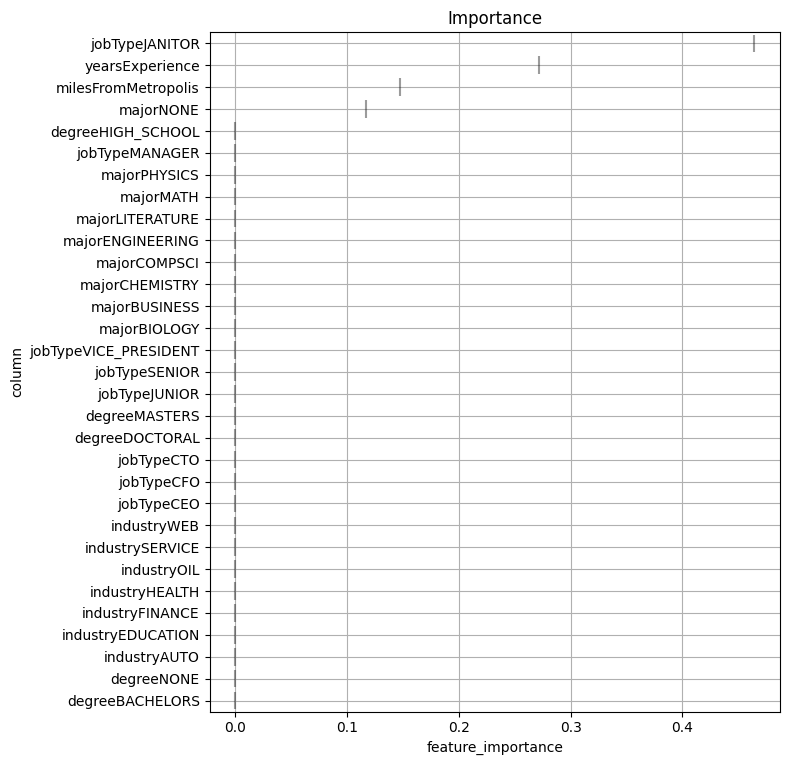

In [78]:
# Fitting a RandomForest Regressor model to the train dataset

# Instantiating the model
rf = RandomForestRegressor(**{'n_estimators' : 64, 'min_samples_leaf' : 0.1, 'max_features' : 'auto', 'max_depth' : 27, 'bootstrap' : False})

# Fitting the model to the data
rf.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# Printing the score of the model
print_score(rf)

# Visualizing the importance of features
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:1000])

### `Gradient Boosting Regressor`

RMSE-train : 19.08414898068928
RMSE-test : 19.125118059478773
Score-train : 0.7544961186709652
Score-test : 0.7532294939530539
MedAE-train : 13.46847089000952
MedAE-test : 13.493302470607802
MeanAE-train : 15.479588272362708
MeanAE-test : 15.509648080710505 



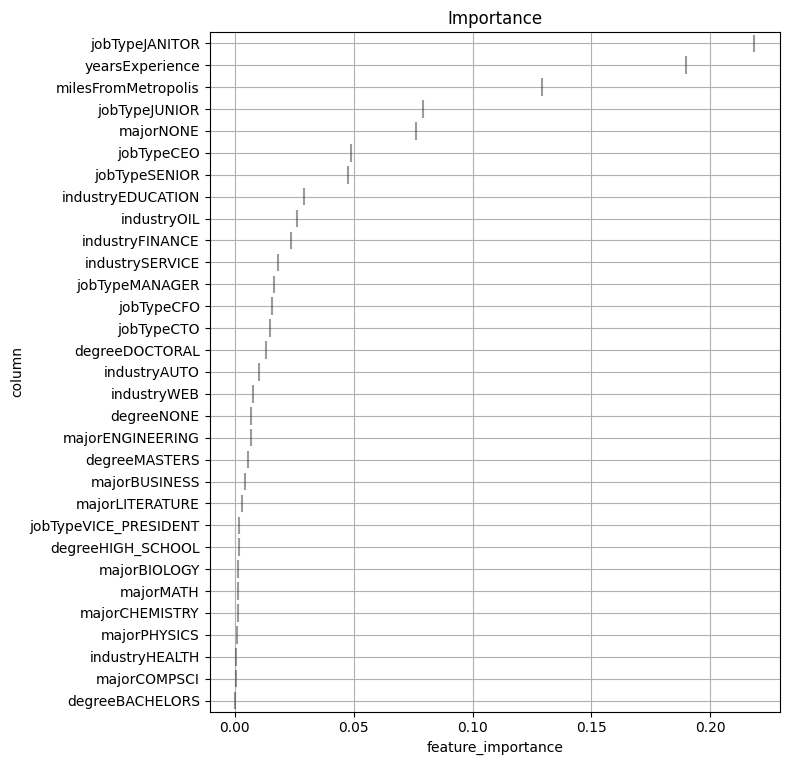

In [79]:
# Importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fitting a Gradient Boosting Regressor model to the train dataset
GBR = GradientBoostingRegressor(**{'n_estimators' : 150, 'min_samples_split' : 0.1, 'max_depth' : 8, 'learning_rate' : 0.25})

# Fitting the model to the data
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing the score of the model
print_score(GBR)

# Visualizing the importance of features
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])

### `Decision Tree Regressor`

RMSE-train : 35.678975785567374
RMSE-test : 35.693930677690126
Score-train : 0.14190074717359158
Score-test : 0.14044483576349331
MedAE-train : 24.63935313620678
MedAE-test : 24.63935313620678
MeanAE-train : 28.681771747114308
MeanAE-test : 28.681618129619775 



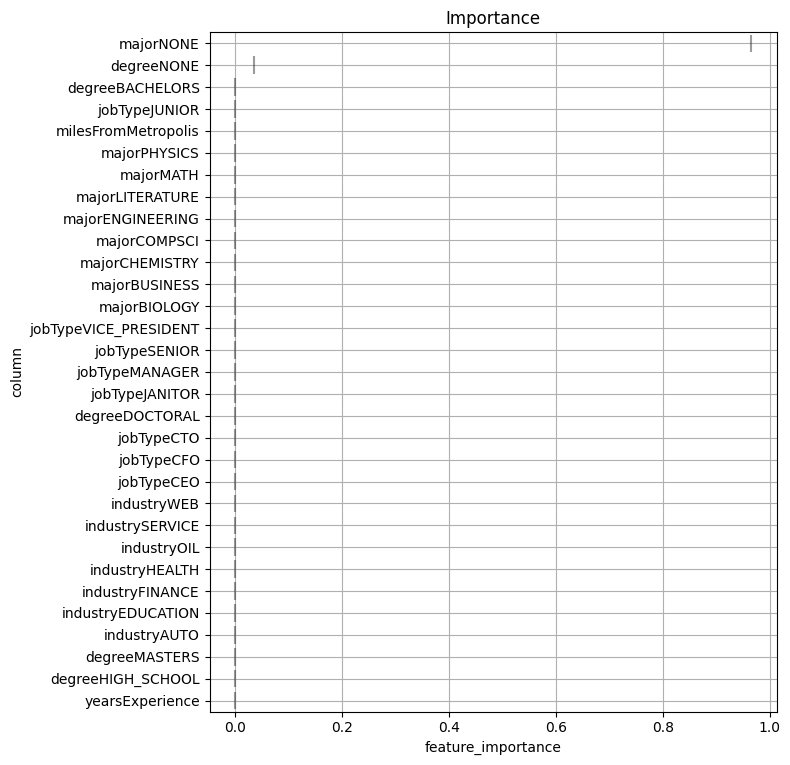

In [84]:
# Importing DecisionTreeRegressor and Instantiating it.
from sklearn.tree import DecisionTreeRegressor

# Fitting the Decision Tree Regressor
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5})

# Fitting the data in the model
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Printing score of the model
print_score(DTR)

# visualizing the importance of features
fig, ax = visualize_importance(DTR.feature_importances_, train_X.iloc[1:10000])

### `XGBoost Regressor`

RMSE-train : 19.315630129330465
RMSE-test : 19.343342923582668
Score-train : 0.7485043212600706
Score-test : 0.7475658747492693
MedAE-train : 13.529613494873047
MedAE-test : 13.531608581542969
MeanAE-train : 15.61494363772204
MeanAE-test : 15.643217035520824 



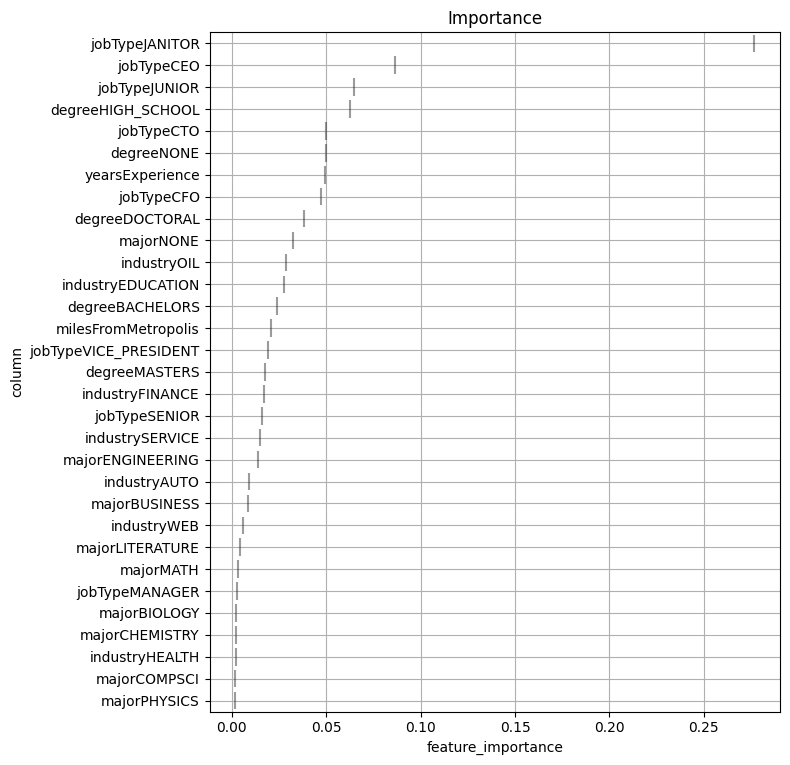

In [80]:
# Fitting a XGB Regressor model to the train dataset and Instantiating the model.

xgbr = XGBRegressor(**{'min_child_weight' : 3, 'max_depth' : 5, 'learning_rate' : 0.15, 'gamma' : 0.1, 'colsample_bytree' : 0.4})
xgbr.fit(X_train.iloc[1:10000], Y_train[1:10000])

# Printing the score of the model
print_score(xgbr)

# visualizing the importance of features
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:10000])

## `Comparing the metrics for tuned models`

In [85]:
models = [DTR, rf, GBR, xgbr]
names = ['Dtree', 'Forest', 'GBR', 'Xboost']
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

In [86]:
print('Metrics on train data :- ')
comp_model_train

Metrics on train data :- 


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,35.678976,30.172419,19.084149,19.315630
1,MedAE,24.639353,20.716430,13.468471,13.529613
2,MAE,28.681772,24.181649,15.479588,15.614944
3,R-squared,-5.092540,-0.570329,0.678991,0.662915


In [87]:
print('Metrics on test data :- ')
comp_model_test

Metrics on test data :- 


,Metric,Dtree,Forest,GBR,Xboost
0,rmse,35.693931,30.182321,19.125118,19.343343
1,MedAE,24.639353,20.798691,13.493302,13.531609
2,MAE,28.681618,24.190890,15.509648,15.643217
3,R-squared,-5.099275,-0.575986,0.677679,0.662235


## `Now working with the test dataset provided`

In [88]:
test_X = test_data
test_X

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [89]:
# Passing test data for One-Hot encoding process

encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType','degree','major','industry'], axis = 1)
test_X = encoder.fit_transform(test_X.drop(['yearsExperience', 'milesFromMetropolis'], axis =1))
test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22,73
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20,47
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17,9
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14,96
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,44


In [90]:
# Passing test data for scaling

col_test = ['yearsExperience', 'milesFromMetropolis']
test_X = scale_data(test_X, col_test)

In [91]:
# Performing the prediction on the test dataset

y_predicted = GBR.predict(test_X)
y_predicted

array([111.01927097,  87.85464708, 176.99729274, ...,  52.03539398,
       155.86090221, 118.86297105])

In [92]:
# Creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)
predictions

,0
0,111.019271
1,87.854647
2,176.997293
3,106.511345
4,121.536844
...,...
999995,168.622334
999996,105.216768
999997,52.035394
999998,155.860902


### `Buisness Problem`

In [93]:
'''
We take some samples provided by the manager so that we can explain him the difference between
the salary the person should be getting and the salary the person is getting.
'''

sample = train_data.sample(100)
sample

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
508912,VICE_PRESIDENT,BACHELORS,COMPSCI,HEALTH,1.000000,0.262626,202
177909,CEO,NONE,NONE,OIL,0.583333,0.292929,183
128787,JUNIOR,MASTERS,LITERATURE,SERVICE,0.333333,0.858586,66
455113,CTO,BACHELORS,CHEMISTRY,WEB,0.791667,0.787879,111
258503,MANAGER,BACHELORS,PHYSICS,AUTO,0.375000,0.565657,94
...,...,...,...,...,...,...,...
93611,VICE_PRESIDENT,DOCTORAL,BIOLOGY,AUTO,0.041667,0.010101,132
98900,MANAGER,MASTERS,PHYSICS,AUTO,0.750000,0.272727,110
149254,SENIOR,NONE,NONE,OIL,0.500000,0.303030,91
34668,SENIOR,DOCTORAL,LITERATURE,AUTO,0.541667,0.777778,112


Now we apply OneHotEncoding to categorical variables and Scaling technique to numerical variables.

In [94]:
train_cat = sample.iloc[:,0:4]

# encoding the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

# Processing the sample data
train = train_X.join(sample.iloc[:,4:])

# Taking those samples whose salary is very less, i.e, the reason for employeer resigning
sample = train[train['salary'] < 60]
sample

# Preparing the X and Y values
x_sample = sample.drop('salary', axis = 1)
y_sample = sample['salary']

# Passing test data for scaling
col_test = ['yearsExperience', 'milesFromMetropolis']
sample_x = scale_data(x_sample, col_test)
sample_x

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
915002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
616146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.347826
871099,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.304348
571620,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000


In [95]:
# Predicting the model

predicted_out = GBR.predict(sample_x)
predicted_out

array([121.53116399, 118.27690467,  83.1830981 ,  53.12044973])

In [96]:
# Real Values
y_sample

915002    49
616146    55
871099    51
571620    49
Name: salary, dtype: int64

As we can see the difference in values :-
Example : The last sample the real value is 58 but the model predicted it to be 74...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

Here, we can clearly see a difference between the real salary given to the employess and the predicted salary which may be the probable reason for the employee to leave the company.



## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.